In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
from scipy import stats
from pprint import pprint
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest as ztest

# Import pG4 from shuffled sequences

In [2]:
dico = {'Chromosome': [], 'locStart': [], 'locEnd': [],
        'Gene': [], 'meancGcC': [], 'Sequence': [],
        'meanG4H': [], 'meanG4NN': [],
        'Strand': [], 'Repro': [], 'Shuffle': [],
        'Grp': [], 'pG4Start': [], 'pG4End': []}
directory = '/home/anais/Documents/Projet/G4Evolution/pG4Shuffle/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        inputfile = directory + '/' + filename
        repro = filename.split('_')[1].split('o')[1]
        grp = filename.split('_')[0].split('o')[1]
        shuffle = filename.split('_')[2].split('.')[0]
        try:
            dfTmp = pd.read_csv(inputfile, sep='\t', index_col=False)
        except:
            for feature in dico:
                if feature == 'Shuffle':
                    dico['Shuffle'].append(shuffle)
                elif feature == 'Grp':
                    dico['Grp'].append(grp)
                elif feature == 'Repro':
                    dico['Repro'].append(repro)
                else:
                    dico[feature].append('Na')
        else:
            dicoTmp = dfTmp.to_dict('records')
            for row in dicoTmp:
                for col in row:
                    dico[col].append(row[col])
                dico['Shuffle'].append(shuffle)
                dico['Grp'].append(grp)
                dico['Repro'].append(repro)
dfpG4Shuffle = pd.DataFrame(data = dico)

In [3]:
dfpG4Shuffle

,Chromosome,locStart,locEnd,Gene,meancGcC,Sequence,meanG4H,meanG4NN,Strand,Repro,Shuffle,Grp,pG4Start,pG4End
0,13,86341220,86412129,ENSPTRG00000006004,10.0,CACTAAAGGCTGGATGATTGGGTGGGGCTATGATGCGGTCGTGGTT...,0.96,0.601484,-,2,Mono,4364,86396860,86396909
1,1,145329072,145382220,ENSGALG00000016870,5.454545,GCGGGGAGCATGTTCAACGGGCTTCGGGAGGAGACACTTAACGCGA...,0.9,0.685126,+,2,Mono,4364,145366042,145366091
2,14,122918971,122984035,ENSMUSG00000041594,17.4,GCAATGTAGGCTCGTGGTGGGGGAATGATATCACGGTATAAAGGGG...,1.04,0.704893,-,2,Mono,4364,122970316,122970365
3,14,122918971,122984035,ENSMUSG00000041594,14.571429,GTCATCGAGGTGATGCACTGAGGGGGGAGAATAAAACGTCAGGGGG...,0.96,0.80801,-,2,Mono,4364,122966346,122966395
4,13,100603927,100675093,ENSG00000125247,14.8,AGCTGGGGGTTGCAGTAAAAGGGTAATCATGAGCGAACTGAAGTGA...,0.98,0.754162,-,2,Mono,4364,100651674,100651723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113121,Chromosome,609961,611202,BAD70465,5.541667,CGCGGCGGGCCACGGCATGTGGCACGTGGGGCCACCGGCCTTCGGG...,0.94,0.873761,-,4,Tri,14248,610003,610052
113122,Chromosome,800089,801021,SSO0942,24.0,GGGTTTGATACAAGGGGGCAAATTAACAATAGTTGGAAAGGGGAAA...,0.98,0.805167,+,6,Mono,13439,800239,800288
113123,Chromosome,1605070,1605999,AF_1787,5.294872,AGGCAGGTATAGGATCAACTGTGGGGACAACCGGGGTCGCGGGCAA...,0.93,0.820307,-,6,Mono,13439,1605620,1605679
113124,Chromosome,1605070,1605999,AF_1787,8.201923,CACCGCAATTCGCGGGGACTTGTGGGGATAAACCTAAAAGGGGGAA...,0.96,0.86002,-,6,Mono,13439,1605240,1605299


# Analyse des repro
## Par arbre
Maintenant que le dataframe est fais, on peut regrouper par repro et type de shuffle pour voir comment évolue la densité en pG4

In [4]:
dico = {'Shuffle': [], 'Repro': [], 'Grp': [], 'NbpG4': []}

groups = dfpG4Shuffle.groupby(['Shuffle', 'Repro', 'Grp'])
for name, group in groups:
    dico['Shuffle'].append(name[0])
    dico['Repro'].append(name[1])
    dico['Grp'].append(name[2])
    dico['NbpG4'].append(len(group))

dfStat = pd.DataFrame(data=dico)

Test avec un groupe d'orthologue:

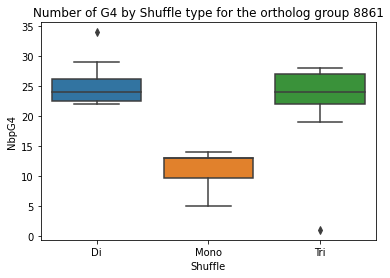

In [5]:
dfTmp = pd.DataFrame()
dfTmp = dfTmp.append(dfStat[dfStat.Grp == '8861'])

plt.title('Number of G4 by Shuffle type for the ortholog group 8861')
sns.boxplot( x=dfTmp["Shuffle"], y=dfTmp["NbpG4"] )
plt.show()

Maintenant je vais essayé de regarder la moyenne des écart type par type de shuffling pour voir si en général ce sont les mêmes.

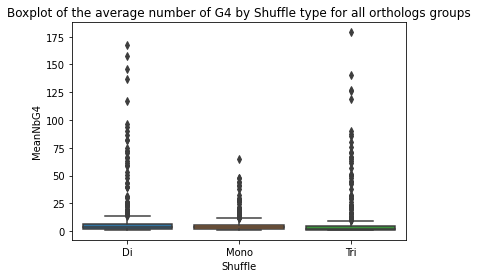

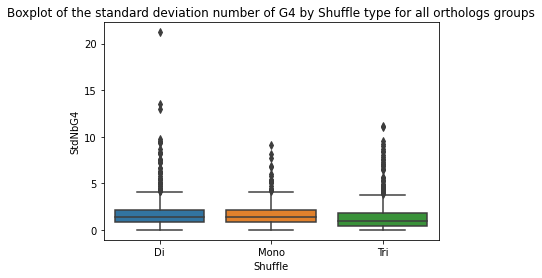

In [6]:
dico = {'Shuffle': [], 'MeanNbG4': [], 'StdNbG4': []}
groups = dfStat.groupby(['Shuffle', 'Grp'])
for name, group in groups:
    dico['Shuffle'].append(name[0])
    dico['StdNbG4'].append(group.NbpG4.std())
    dico['MeanNbG4'].append(group.NbpG4.mean())

dfStatMean = pd.DataFrame(data=dico)
plt.title('Boxplot of the average number of G4 by Shuffle type for all orthologs groups')
sns.boxplot( x=dfStatMean["Shuffle"], y=dfStatMean["MeanNbG4"] )
plt.show()
plt.title('Boxplot of the standard deviation number of G4 by Shuffle type for all orthologs groups')
sns.boxplot( x=dfStatMean["Shuffle"], y=dfStatMean["StdNbG4"] )
plt.show()

By tree, I don't think it is very informative, at least I do not know if it is a lot of variance or no compare to the article 2. So I will compute it by species but to to so I need to add genes id and then found the species they are from.

## By species

In [7]:
dfpG4Shuffle

,Chromosome,locStart,locEnd,Gene,meancGcC,Sequence,meanG4H,meanG4NN,Strand,Repro,Shuffle,Grp,pG4Start,pG4End
0,13,86341220,86412129,ENSPTRG00000006004,10.0,CACTAAAGGCTGGATGATTGGGTGGGGCTATGATGCGGTCGTGGTT...,0.96,0.601484,-,2,Mono,4364,86396860,86396909
1,1,145329072,145382220,ENSGALG00000016870,5.454545,GCGGGGAGCATGTTCAACGGGCTTCGGGAGGAGACACTTAACGCGA...,0.9,0.685126,+,2,Mono,4364,145366042,145366091
2,14,122918971,122984035,ENSMUSG00000041594,17.4,GCAATGTAGGCTCGTGGTGGGGGAATGATATCACGGTATAAAGGGG...,1.04,0.704893,-,2,Mono,4364,122970316,122970365
3,14,122918971,122984035,ENSMUSG00000041594,14.571429,GTCATCGAGGTGATGCACTGAGGGGGGAGAATAAAACGTCAGGGGG...,0.96,0.80801,-,2,Mono,4364,122966346,122966395
4,13,100603927,100675093,ENSG00000125247,14.8,AGCTGGGGGTTGCAGTAAAAGGGTAATCATGAGCGAACTGAAGTGA...,0.98,0.754162,-,2,Mono,4364,100651674,100651723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113121,Chromosome,609961,611202,BAD70465,5.541667,CGCGGCGGGCCACGGCATGTGGCACGTGGGGCCACCGGCCTTCGGG...,0.94,0.873761,-,4,Tri,14248,610003,610052
113122,Chromosome,800089,801021,SSO0942,24.0,GGGTTTGATACAAGGGGGCAAATTAACAATAGTTGGAAAGGGGAAA...,0.98,0.805167,+,6,Mono,13439,800239,800288
113123,Chromosome,1605070,1605999,AF_1787,5.294872,AGGCAGGTATAGGATCAACTGTGGGGACAACCGGGGTCGCGGGCAA...,0.93,0.820307,-,6,Mono,13439,1605620,1605679
113124,Chromosome,1605070,1605999,AF_1787,8.201923,CACCGCAATTCGCGGGGACTTGTGGGGATAAACCTAAAAGGGGGAA...,0.96,0.86002,-,6,Mono,13439,1605240,1605299


The ensembl gene ID is already present so I just have to add the species.

In [8]:
# create a dico {gene:sp}
dicoGeneListbySp = {}
homologyDir = '/home/anais/Documents/Projet/G4Evolution/Homology/'
for path, dirs, files in os.walk(homologyDir):
    # for each element of the directory to passed
    for filename in files: # for each files
        if 'txt' in filename:
            inputfile = homologyDir + filename
            sp = filename.split('.')[0]
            with open(inputfile) as f:
                content = f.read()
                lines = content.split('\n')
                for l in lines:
                    dicoGeneListbySp[l] = sp

In [9]:
dfpG4Shuffle['Sp'] = dfpG4Shuffle['Gene'].map(dicoGeneListbySp)
dfpG4Shuffle

,Chromosome,locStart,locEnd,Gene,meancGcC,Sequence,meanG4H,meanG4NN,Strand,Repro,Shuffle,Grp,pG4Start,pG4End,Sp
0,13,86341220,86412129,ENSPTRG00000006004,10.0,CACTAAAGGCTGGATGATTGGGTGGGGCTATGATGCGGTCGTGGTT...,0.96,0.601484,-,2,Mono,4364,86396860,86396909,pan_troglodytes
1,1,145329072,145382220,ENSGALG00000016870,5.454545,GCGGGGAGCATGTTCAACGGGCTTCGGGAGGAGACACTTAACGCGA...,0.9,0.685126,+,2,Mono,4364,145366042,145366091,gallus_gallus
2,14,122918971,122984035,ENSMUSG00000041594,17.4,GCAATGTAGGCTCGTGGTGGGGGAATGATATCACGGTATAAAGGGG...,1.04,0.704893,-,2,Mono,4364,122970316,122970365,mus_musculus
3,14,122918971,122984035,ENSMUSG00000041594,14.571429,GTCATCGAGGTGATGCACTGAGGGGGGAGAATAAAACGTCAGGGGG...,0.96,0.80801,-,2,Mono,4364,122966346,122966395,mus_musculus
4,13,100603927,100675093,ENSG00000125247,14.8,AGCTGGGGGTTGCAGTAAAAGGGTAATCATGAGCGAACTGAAGTGA...,0.98,0.754162,-,2,Mono,4364,100651674,100651723,homo_sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113121,Chromosome,609961,611202,BAD70465,5.541667,CGCGGCGGGCCACGGCATGTGGCACGTGGGGCCACCGGCCTTCGGG...,0.94,0.873761,-,4,Tri,14248,610003,610052,thermus_thermophilus_hb8
113122,Chromosome,800089,801021,SSO0942,24.0,GGGTTTGATACAAGGGGGCAAATTAACAATAGTTGGAAAGGGGAAA...,0.98,0.805167,+,6,Mono,13439,800239,800288,sulfolobus_solfataricus_p2
113123,Chromosome,1605070,1605999,AF_1787,5.294872,AGGCAGGTATAGGATCAACTGTGGGGACAACCGGGGTCGCGGGCAA...,0.93,0.820307,-,6,Mono,13439,1605620,1605679,archaeoglobus_fulgidus_dsm_4304
113124,Chromosome,1605070,1605999,AF_1787,8.201923,CACCGCAATTCGCGGGGACTTGTGGGGATAAACCTAAAAGGGGGAA...,0.96,0.86002,-,6,Mono,13439,1605240,1605299,archaeoglobus_fulgidus_dsm_4304


Now I need to get the stat and graph!

In [10]:
dico = {'Shuffle': [], 'Repro': [], 'Sp': [], 'NbpG4': []}

groups = dfpG4Shuffle.groupby(['Shuffle', 'Repro', 'Sp'])
for name, group in groups:
    dico['Shuffle'].append(name[0])
    dico['Repro'].append(name[1])
    dico['Sp'].append(name[2])
    dico['NbpG4'].append(len(group))

dfStatSp = pd.DataFrame(data=dico)
dfStatSp

,Shuffle,Repro,Sp,NbpG4
0,Di,1,anaplasma_phagocytophilum_str_hz,16
1,Di,1,anolis_carolinensis,69
2,Di,1,apis_mellifera,1
3,Di,1,aquifex_aeolicus_vf5,58
4,Di,1,archaeoglobus_fulgidus_dsm_4304,55
...,...,...,...,...
1426,Tri,9,streptococcus_pneumoniae_tigr4,2
1427,Tri,9,sulfolobus_solfataricus_p2,3
1428,Tri,9,thermoplasma_acidophilum_dsm_1728,7
1429,Tri,9,thermus_thermophilus_hb8,211


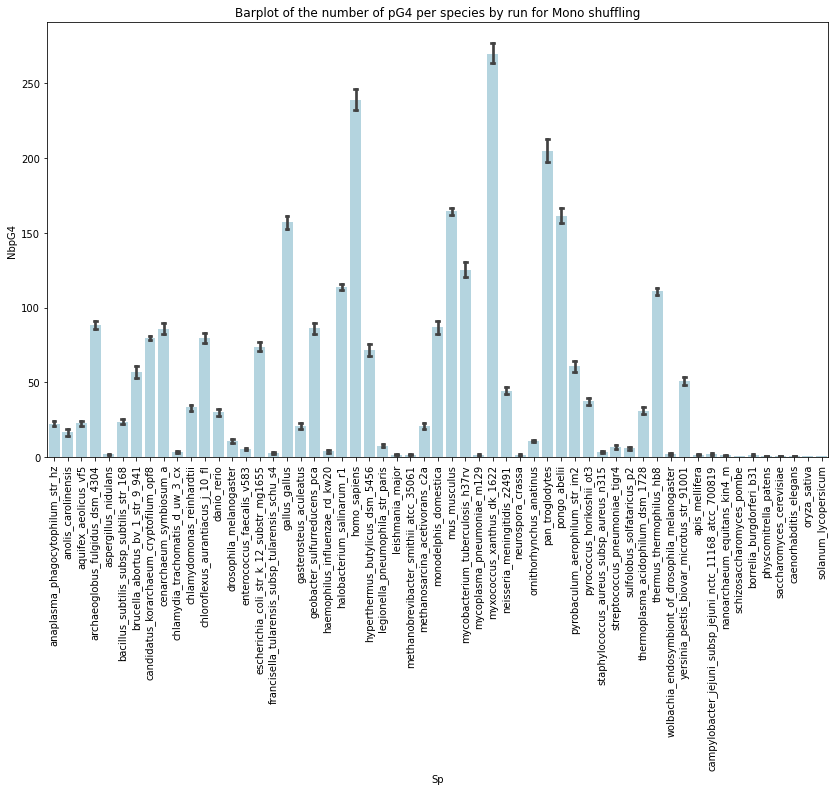

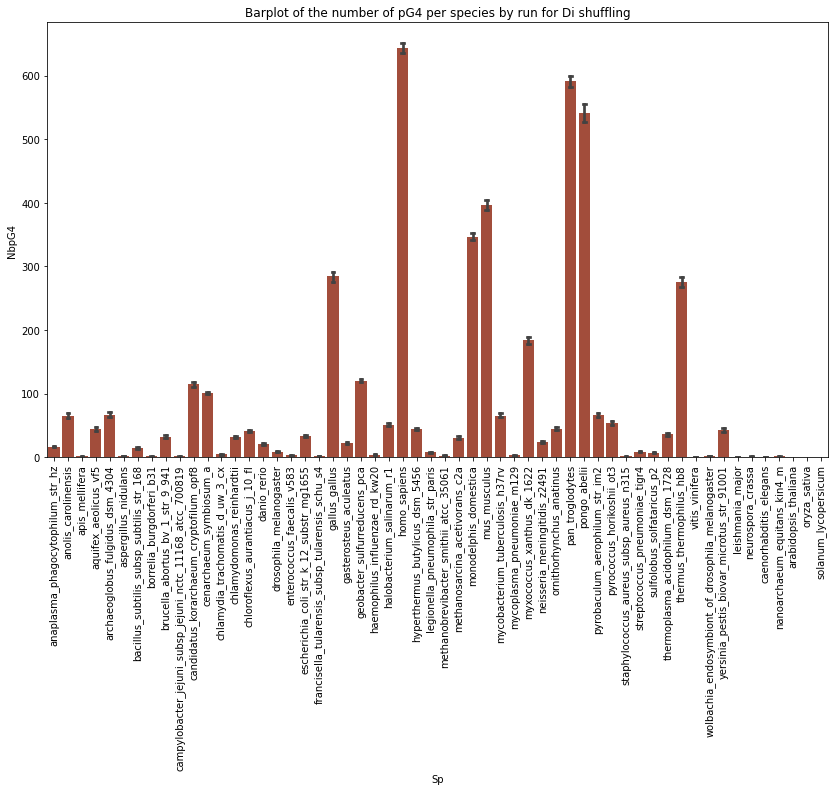

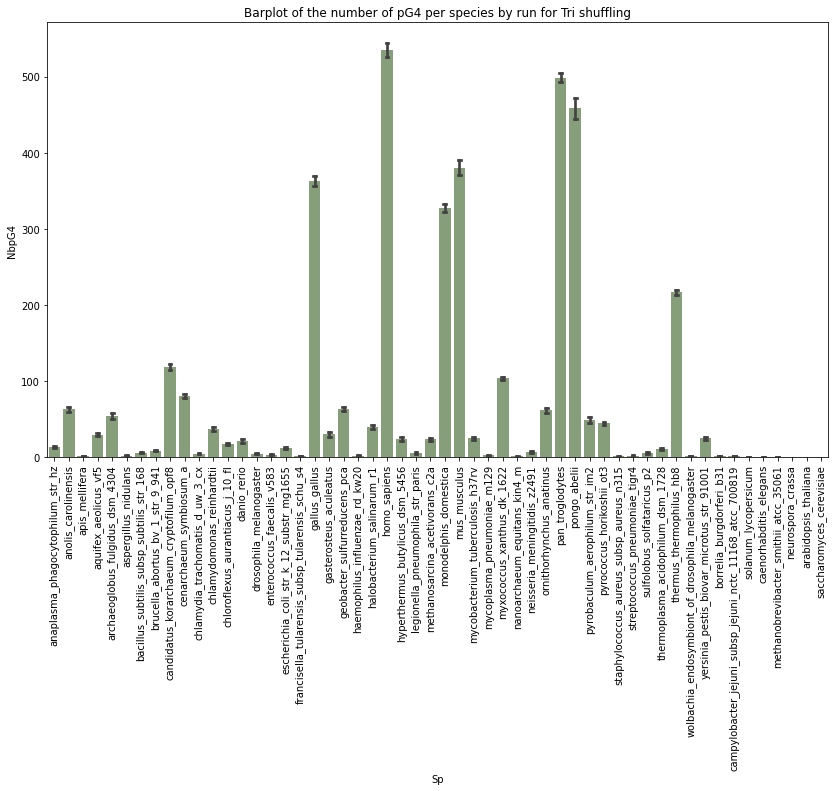

In [11]:
# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
plt.title('Barplot of the number of pG4 per species by run for Mono shuffling')
ax = sns.barplot(x="Sp", y="NbpG4", data=dfStatSp[dfStatSp.Shuffle == 'Mono'], estimator=np.mean, ci=85, capsize=.2, color='lightblue')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
plt.title('Barplot of the number of pG4 per species by run for Di shuffling')
ax = sns.barplot(x="Sp", y="NbpG4", data=dfStatSp[dfStatSp.Shuffle == 'Di'], estimator=np.mean, ci=85, capsize=.2, color='#B3422A')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 8))
plt.title('Barplot of the number of pG4 per species by run for Tri shuffling')
ax = sns.barplot(x="Sp", y="NbpG4", data=dfStatSp[dfStatSp.Shuffle == 'Tri'], estimator=np.mean, ci=85, capsize=.2, color='#85A474')
plt.xticks(rotation=90)
plt.show()

Since the graphs are huge, I would like to make 1 graph per realm and have the 3 shuffle type in them. So I need to add kingdom.

In [12]:
# create a dico like {sp:kingdom}
dicoKingdom = {'pan_troglodytes' : 'Eukaryote', 'homo_sapiens' : 'Eukaryote',
    'pongo_abelii' : 'Eukaryote', 'mus_musculus' : 'Eukaryote',
    'monodelphis_domestica' : 'Eukaryote', 'ornithorhynchus_anatinus' : 'Eukaryote',
    'anolis_carolinensis' : 'Eukaryote', 'gallus_gallus' : 'Eukaryote',
    'danio_rerio' : 'Eukaryote', 'gasterosteus_aculeatus' : 'Eukaryote',
    'drosophila_melanogaster' : 'Eukaryote', 'apis_mellifera' : 'Eukaryote',
    'caenorhabditis_elegans' : 'Eukaryote', 'neurospora_crassa' : 'Eukaryote',
    'aspergillus_nidulans' : 'Eukaryote', 'saccharomyces_cerevisiae' : 'Eukaryote',
    'schizosaccharomyces_pombe' : 'Eukaryote', 'dictyostelium_discoideum' : 'Eukaryote',
    'arabidopsis_thaliana' : 'Eukaryote', 'vitis_vinifera' : 'Eukaryote',
    'solanum_lycopersicum' : 'Eukaryote', 'oryza_sativa' : 'Eukaryote',
    'physcomitrella_patens' : 'Eukaryote', 'chlamydomonas_reinhardtii' : 'Eukaryote',
    'leishmania_major' : 'Eukaryote', 'methanosarcina_acetivorans_c2a' : 'Archaea',
    'halobacterium_salinarum_r1' : 'Archaea', 'hyperthermus_butylicus_dsm_5456' : 'Archaea',
    'archaeoglobus_fulgidus_dsm_4304' : 'Archaea', 'methanobrevibacter_smithii_atcc_35061' : 'Archaea',
    'pyrococcus_horikoshii_ot3' : 'Archaea', 'thermoplasma_acidophilum_dsm_1728' : 'Archaea',
    'sulfolobus_solfataricus_p2' : 'Archaea', 'pyrobaculum_aerophilum_str_im2' : 'Archaea',
    'nanoarchaeum_equitans_kin4_m' : 'Archaea', 'candidatus_korarchaeum_cryptofilum_opf8' : 'Archaea',
    'cenarchaeum_symbiosum_a' : 'Archaea', 'aquifex_aeolicus_vf5' : 'Bacteria',
    'mycoplasma_pneumoniae_m129' : 'Bacteria', 'staphylococcus_aureus_subsp_aureus_n315' : 'Bacteria',
    'bacillus_subtilis_subsp_subtilis_str_168' : 'Bacteria', 'enterococcus_faecalis_v583' : 'Bacteria',
    'streptococcus_pneumoniae_tigr4' : 'Bacteria', 'chloroflexus_aurantiacus_j_10_fl' : 'Bacteria',
    'mycobacterium_tuberculosis_h37rv' : 'Bacteria', 'thermus_thermophilus_hb8' : 'Bacteria',
    'chlamydia_trachomatis_d_uw_3_cx' : 'Bacteria', 'borrelia_burgdorferi_b31' : 'Bacteria',
    'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Bacteria',
    'myxococcus_xanthus_dk_1622' : 'Bacteria', 'geobacter_sulfurreducens_pca' : 'Bacteria',
    'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Bacteria',
    'anaplasma_phagocytophilum_str_hz' : 'Bacteria',
    'brucella_abortus_bv_1_str_9_941' : 'Bacteria', 'neisseria_meningitidis_z2491' : 'Bacteria',
    'legionella_pneumophila_str_paris' : 'Bacteria', 'francisella_tularensis_subsp_tularensis_schu_s4' : 'Bacteria',
    'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Bacteria',
    'haemophilus_influenzae_rd_kw20' : 'Bacteria', 'yersinia_pestis_biovar_microtus_str_91001' : 'Bacteria',
    'escherichia_coli_str_k_12_substr_mg1655' : 'Bacteria'}

dfpG4Shuffle['Kingdom'] = dfpG4Shuffle['Sp'].map(dicoKingdom)
dfpG4Shuffle

,Chromosome,locStart,locEnd,Gene,meancGcC,Sequence,meanG4H,meanG4NN,Strand,Repro,Shuffle,Grp,pG4Start,pG4End,Sp,Kingdom
0,13,86341220,86412129,ENSPTRG00000006004,10.0,CACTAAAGGCTGGATGATTGGGTGGGGCTATGATGCGGTCGTGGTT...,0.96,0.601484,-,2,Mono,4364,86396860,86396909,pan_troglodytes,Eukaryote
1,1,145329072,145382220,ENSGALG00000016870,5.454545,GCGGGGAGCATGTTCAACGGGCTTCGGGAGGAGACACTTAACGCGA...,0.9,0.685126,+,2,Mono,4364,145366042,145366091,gallus_gallus,Eukaryote
2,14,122918971,122984035,ENSMUSG00000041594,17.4,GCAATGTAGGCTCGTGGTGGGGGAATGATATCACGGTATAAAGGGG...,1.04,0.704893,-,2,Mono,4364,122970316,122970365,mus_musculus,Eukaryote
3,14,122918971,122984035,ENSMUSG00000041594,14.571429,GTCATCGAGGTGATGCACTGAGGGGGGAGAATAAAACGTCAGGGGG...,0.96,0.80801,-,2,Mono,4364,122966346,122966395,mus_musculus,Eukaryote
4,13,100603927,100675093,ENSG00000125247,14.8,AGCTGGGGGTTGCAGTAAAAGGGTAATCATGAGCGAACTGAAGTGA...,0.98,0.754162,-,2,Mono,4364,100651674,100651723,homo_sapiens,Eukaryote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113121,Chromosome,609961,611202,BAD70465,5.541667,CGCGGCGGGCCACGGCATGTGGCACGTGGGGCCACCGGCCTTCGGG...,0.94,0.873761,-,4,Tri,14248,610003,610052,thermus_thermophilus_hb8,Bacteria
113122,Chromosome,800089,801021,SSO0942,24.0,GGGTTTGATACAAGGGGGCAAATTAACAATAGTTGGAAAGGGGAAA...,0.98,0.805167,+,6,Mono,13439,800239,800288,sulfolobus_solfataricus_p2,Archaea
113123,Chromosome,1605070,1605999,AF_1787,5.294872,AGGCAGGTATAGGATCAACTGTGGGGACAACCGGGGTCGCGGGCAA...,0.93,0.820307,-,6,Mono,13439,1605620,1605679,archaeoglobus_fulgidus_dsm_4304,Archaea
113124,Chromosome,1605070,1605999,AF_1787,8.201923,CACCGCAATTCGCGGGGACTTGTGGGGATAAACCTAAAAGGGGGAA...,0.96,0.86002,-,6,Mono,13439,1605240,1605299,archaeoglobus_fulgidus_dsm_4304,Archaea


In [13]:
dfStatSp['Kingdom'] = dfStatSp['Sp'].map(dicoKingdom)
dfStatSp

,Shuffle,Repro,Sp,NbpG4,Kingdom
0,Di,1,anaplasma_phagocytophilum_str_hz,16,Bacteria
1,Di,1,anolis_carolinensis,69,Eukaryote
2,Di,1,apis_mellifera,1,Eukaryote
3,Di,1,aquifex_aeolicus_vf5,58,Bacteria
4,Di,1,archaeoglobus_fulgidus_dsm_4304,55,Archaea
...,...,...,...,...,...
1426,Tri,9,streptococcus_pneumoniae_tigr4,2,Bacteria
1427,Tri,9,sulfolobus_solfataricus_p2,3,Archaea
1428,Tri,9,thermoplasma_acidophilum_dsm_1728,7,Archaea
1429,Tri,9,thermus_thermophilus_hb8,211,Bacteria


<Figure size 1800x1224 with 0 Axes>

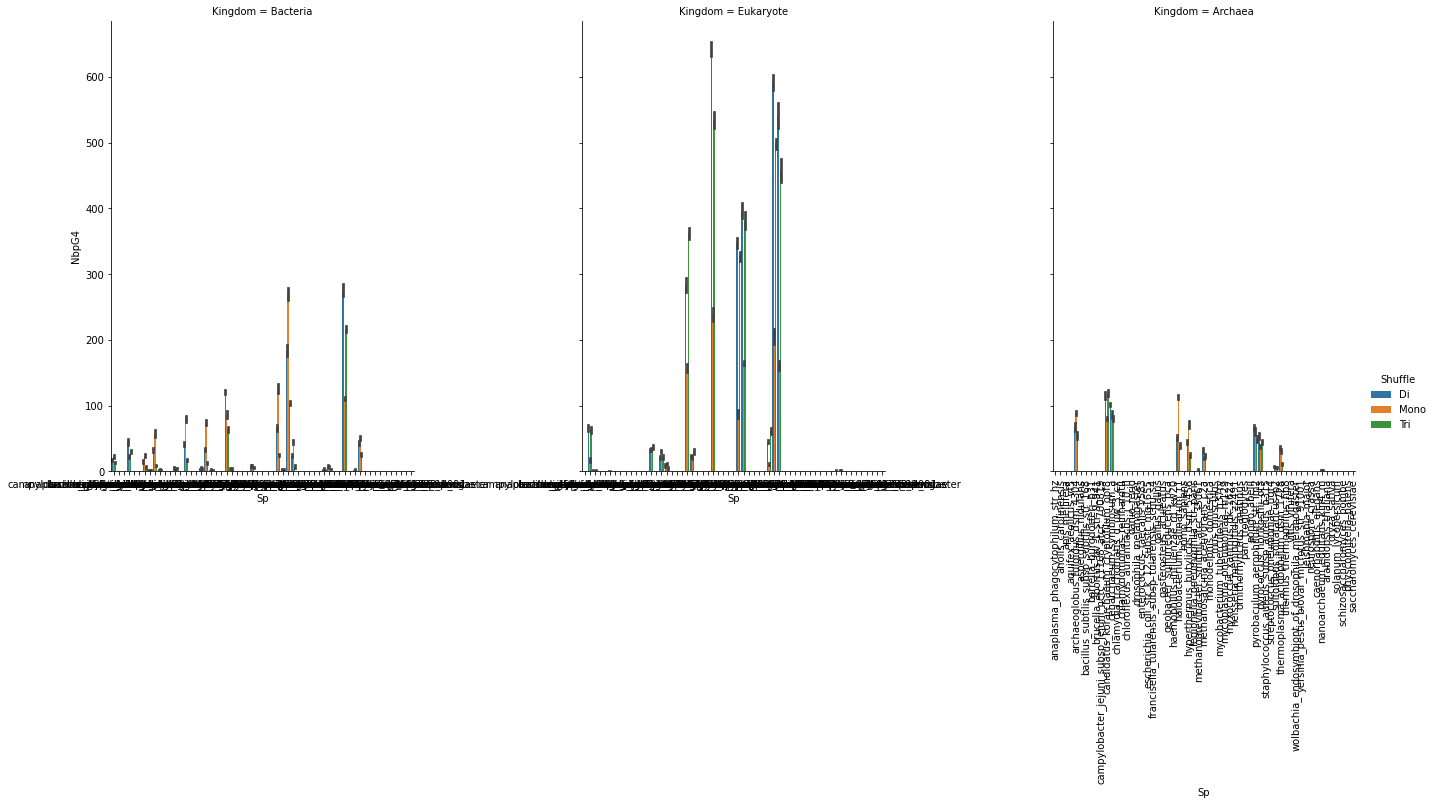

In [14]:
plt.figure(figsize=(25, 17))
sns.catplot(x="Sp", y="NbpG4", hue="Shuffle", col="Kingdom", data=dfStatSp, kind="bar", height=7, aspect=.9,);
plt.xticks(rotation=90)
plt.show()

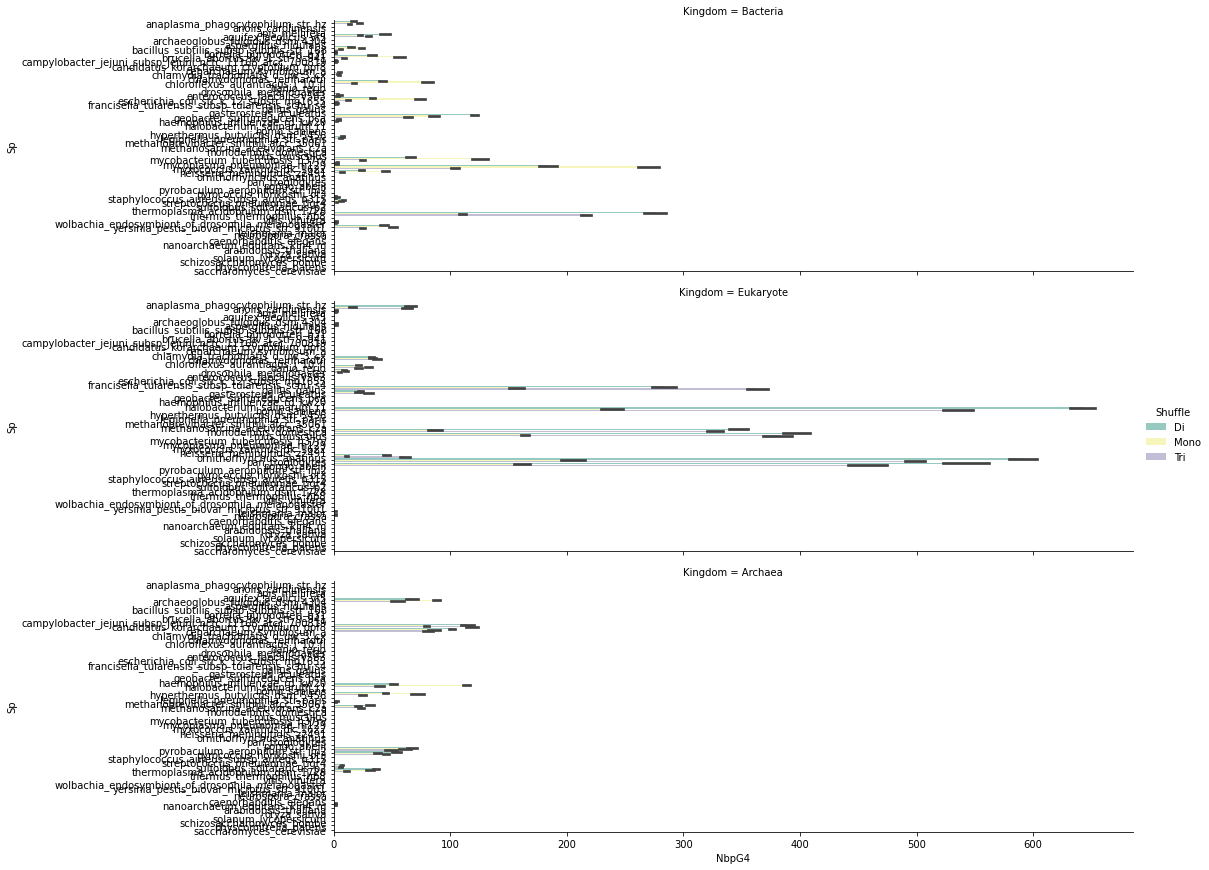

In [15]:
sns.catplot(x="NbpG4", y="Sp", hue="Shuffle", row="Kingdom",
            data=dfStatSp,
            orient="h", height=4, aspect=4, palette="Set3",
            kind="bar", dodge=True)

In [16]:
dicoTp = {'Sp': [], 'Mean': [], 'Std': [], 'Type': [], 'Kingdom': []}  

groups = dfStatSp.groupby(['Shuffle', 'Sp'])
for name, group in groups:
    dicoTp['Sp'].append(name[1])
    dicoTp['Mean'].append(group.NbpG4.mean())
    dicoTp['Std'].append(group.NbpG4.std())
    dicoTp['Type'].append(name[0])
    dicoTp['Kingdom'].append(list(set(group.Kingdom))[0])
    
dfHisto = pd.DataFrame(data=dicoTp)
dfHisto

,Sp,Mean,Std,Type,Kingdom
0,anaplasma_phagocytophilum_str_hz,16.800000,3.259175,Di,Bacteria
1,anolis_carolinensis,65.500000,8.127457,Di,Eukaryote
2,apis_mellifera,1.833333,1.169045,Di,Eukaryote
3,aquifex_aeolicus_vf5,44.100000,7.187180,Di,Bacteria
4,arabidopsis_thaliana,1.000000,NaN,Di,Eukaryote
...,...,...,...,...,...
162,sulfolobus_solfataricus_p2,5.800000,2.299758,Tri,Archaea
163,thermoplasma_acidophilum_dsm_1728,11.300000,3.529243,Tri,Archaea
164,thermus_thermophilus_hb8,216.600000,7.229569,Tri,Bacteria
165,wolbachia_endosymbiont_of_drosophila_melanogaster,1.625000,0.744024,Tri,Bacteria


------------
Archaea


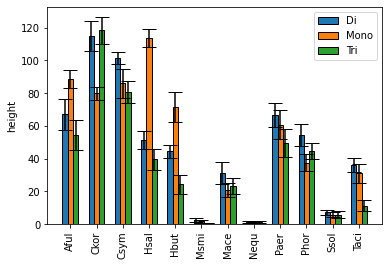

------------
Bacteria


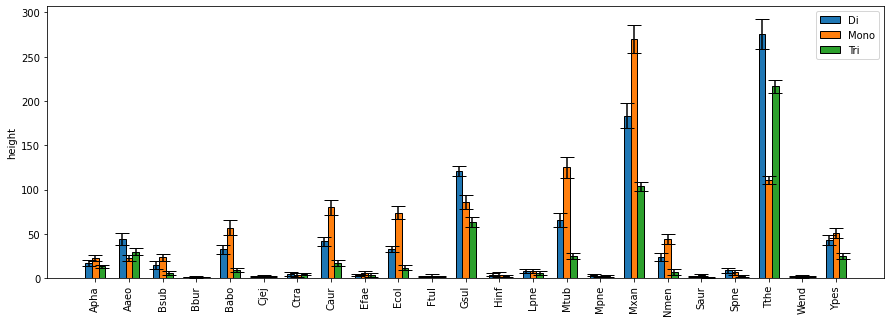

------------
Eukaryote


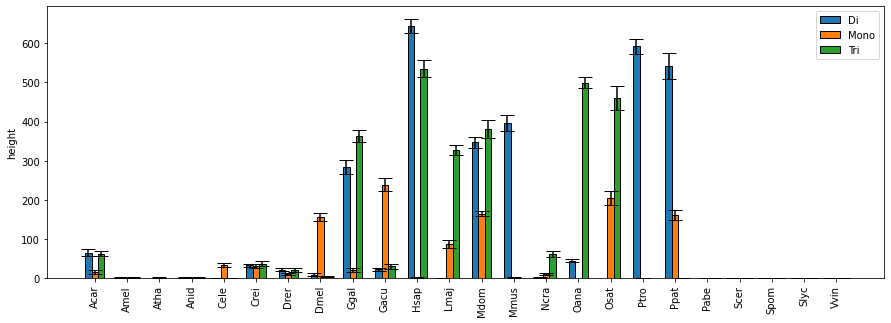

In [17]:
groups = dfHisto.groupby('Kingdom')
for name, group in groups:
    print('------------')
    print(name)
    if name == 'Eukaryote':
        group = group.append(pd.DataFrame(data={'Sp': ['physcomitrella_patens'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Di'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['solanum_lycopersicum'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Di'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['saccharomyces_cerevisiae'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Di'], 'Kingdom': ['Eukaryote']}))
        
        group = group.append(pd.DataFrame(data={'Sp': ['arabidopsis_thaliana'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Mono'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['vitis_vinifera'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Mono'], 'Kingdom': ['Eukaryote']}))
        
        group = group.append(pd.DataFrame(data={'Sp': ['leishmania_major'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Tri'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['oryza_sativa'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Tri'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['physcomitrella_patens'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Tri'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['schizosaccharomyces_pombe'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Tri'], 'Kingdom': ['Eukaryote']}))
        group = group.append(pd.DataFrame(data={'Sp': ['vitis_vinifera'],
                                    'Mean': [0], 'Std': [0], 'Type': ['Tri'], 'Kingdom': ['Eukaryote']}))
    
    # width of the bars
    barWidth = 0.2

    # Choose the height of the blue bars
    bars00 = group[group.Type == 'Di']['Mean']

    # Choose the height of the blue bars
    bars0 = group[group.Type == 'Mono']['Mean']

    # Choose the height of the cyan bars
    bars2 = group[group.Type == 'Tri']['Mean']

    # Choose the height of the error bars (bars1)
    yer00 = group[group.Type == 'Di']['Std']

    # Choose the height of the error bars (bars1)
    yer0 = group[group.Type == 'Mono']['Std']

    # Choose the height of the error bars (bars2)
    yer2 = group[group.Type == 'Tri']['Std']

    # The x position of bars
    r00 = np.arange(len(bars00))
    r0 = [x + barWidth for x in r00]
    r2 = [x + barWidth for x in r0]

    # Create blue bars
    plt.bar(r00, bars00, width = barWidth, edgecolor = 'black', yerr=yer00, capsize=7, label='Di')

    # Create blue bars
    plt.bar(r0, bars0, width = barWidth, edgecolor = 'black', yerr=yer0, capsize=7, label='Mono')

    # Create cyan bars
    plt.bar(r2, bars2, width = barWidth, edgecolor = 'black', yerr=yer2, capsize=7, label='Tri')

    # general layout
    if name == 'Archaea':
        plt.xticks([r + barWidth for r in range(len(bars2))], ['Aful', 'Ckor', 'Csym', 'Hsal',
              'Hbut', 'Msmi', 'Mace', 'Nequ', 'Paer', 'Phor', 'Ssol', 'Taci'])
    elif name == 'Bacteria':
        plt.xticks([r + barWidth for r in range(len(bars2))], ['Apha', 'Aaeo', 'Bsub', 'Bbur',
              'Babo', 'Cjej', 'Ctra', 'Caur', 'Efae', 'Ecol', 'Ftul', 'Gsul', 'Hinf', 'Lpne',
              'Mtub', 'Mpne', 'Mxan', 'Nmen', 'Saur', 'Spne', 'Tthe', 'Wend', 'Ypes'])
    else:
        plt.xticks([r + barWidth for r in range(len(bars2))], ['Acar', 'Amel', 'Atha', 'Anid',
              'Cele', 'Crei', 'Drer', 'Dmel', 'Ggal', 'Gacu', 'Hsap', 'Lmaj', 'Mdom', 'Mmus',
              'Ncra', 'Oana', 'Osat', 'Ptro', 'Ppat', 'Pabe', 'Scer', 'Spom', 'Slyc', 'Vvin'])

    plt.ylabel('height')
    plt.xticks(rotation=90)
    plt.legend()

    # Show graphic
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.show()

Everything is fine for Archaea and Bacteria but I'm having a lot of missing value for eukaryotes??? Also I should add the Wt value. **I also thought, how will I do with the wide prediction? Should I check also in the shuffle?**

AND ALSO I FORGOT TO LOOK AT DENSITIES AND NOT NB
## Add Wt value as well as length for densities

In [18]:
# get length gene in the grp
dico = {'LengthSeq': [], 'Repro': [], 'Gene': [], 'Grp': [], 'Shuffle': []}
directory = '/home/anais/Documents/Projet/G4Evolution/FastaOrthoShuffle/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        inputfile = directory + '/' + filename
        repro = filename.split('_')[1].split('o')[1]
        grp = filename.split('_')[0].split('o')[1]
        shuffle = filename.split('_')[2].split('.')[0]
        fastaOrigin = SeqIO.parse(open(inputfile),'fasta')
        for fasta in fastaOrigin:
            name, seq = fasta.id, str(fasta.seq)
            dico['Shuffle'].append(shuffle)
            dico['Grp'].append(grp)
            dico['Repro'].append(repro)
            dico['LengthSeq'].append(len(seq))
            dico['Gene'].append(name.split(':')[0])
dfGeneShuffleLength = pd.DataFrame(data=dico)
dfGeneShuffleLength['Sp'] = dfGeneShuffleLength['Gene'].map(dicoGeneListbySp)
dfGeneShuffleLength

,LengthSeq,Repro,Gene,Grp,Shuffle,Sp
0,5646,2,WBGene00018175,4364,Mono,caenorhabditis_elegans
1,3472,2,GB52619,4364,Mono,apis_mellifera
2,9131,2,ENSGACG00000001904,4364,Mono,gasterosteus_aculeatus
3,80391,2,ENSMODG00000007425,4364,Mono,monodelphis_domestica
4,70910,2,ENSPTRG00000006004,4364,Mono,pan_troglodytes
...,...,...,...,...,...,...
388645,933,6,SSO0942,13439,Mono,sulfolobus_solfataricus_p2
388646,930,6,AF_1787,13439,Mono,archaeoglobus_fulgidus_dsm_4304
388647,1143,6,BAA30927,13439,Mono,pyrococcus_horikoshii_ot3
388648,987,6,MA_3524,13439,Mono,methanosarcina_acetivorans_c2a


In [19]:
dico = {'Sp': [], 'Shuffle': [], 'Repro': [], 'LengthSeq': []}
groups = dfGeneShuffleLength.groupby(['Sp', 'Shuffle', 'Repro'])
for name, group in groups:
    dico['Sp'].append(name[0])
    dico['Shuffle'].append(name[1])
    dico['Repro'].append(name[2])
    dico['LengthSeq'].append(group.LengthSeq.sum())
dfStatBySp = pd.DataFrame(data=dico)
dfStatBySp
# groups = dfGeneShuffleLength.groupby(['Sp', 'Shuffle', 'Repro'])
# for name, group in groups:
#     print(name[0]+'\t'+name[1]+'\t'+name[2]+'\t'+str(group.LengthSeq.sum()))
# This was to check if there was the same legnth for all repro of the eukaryotes who had some strange results, and everything is normal

,Sp,Shuffle,Repro,LengthSeq
0,anaplasma_phagocytophilum_str_hz,Di,1,198225
1,anaplasma_phagocytophilum_str_hz,Di,10,198225
2,anaplasma_phagocytophilum_str_hz,Di,2,198225
3,anaplasma_phagocytophilum_str_hz,Di,3,198225
4,anaplasma_phagocytophilum_str_hz,Di,4,198225
...,...,...,...,...
1795,yersinia_pestis_biovar_microtus_str_91001,Tri,5,674256
1796,yersinia_pestis_biovar_microtus_str_91001,Tri,6,674256
1797,yersinia_pestis_biovar_microtus_str_91001,Tri,7,674256
1798,yersinia_pestis_biovar_microtus_str_91001,Tri,8,674256


In [20]:
# groups = dfpG4Shuffle.groupby(['Shuffle', 'Repro', 'Sp'])
# for name, group in groups:
#     dico['Shuffle'].append(name[0])
#     dico['Repro'].append(name[1])
#     dico['Sp'].append(name[2])
#     dico['NbpG4'].append(len(group))

# dfStatSp = pd.DataFrame(data=dico)
# dfStatSp

dfStatBySp = dfStatBySp.merge(dfStatSp, how='left', on=['Shuffle', 'Repro', 'Sp'])
dfStatBySp

,Sp,Shuffle,Repro,LengthSeq,NbpG4,Kingdom
0,anaplasma_phagocytophilum_str_hz,Di,1,198225,16.0,Bacteria
1,anaplasma_phagocytophilum_str_hz,Di,10,198225,16.0,Bacteria
2,anaplasma_phagocytophilum_str_hz,Di,2,198225,20.0,Bacteria
3,anaplasma_phagocytophilum_str_hz,Di,3,198225,14.0,Bacteria
4,anaplasma_phagocytophilum_str_hz,Di,4,198225,16.0,Bacteria
...,...,...,...,...,...,...
1795,yersinia_pestis_biovar_microtus_str_91001,Tri,5,674256,20.0,Bacteria
1796,yersinia_pestis_biovar_microtus_str_91001,Tri,6,674256,24.0,Bacteria
1797,yersinia_pestis_biovar_microtus_str_91001,Tri,7,674256,27.0,Bacteria
1798,yersinia_pestis_biovar_microtus_str_91001,Tri,8,674256,32.0,Bacteria


In [21]:
# get WT pG4
dico = {'Gene': [], 'NbG4': [], 'Sp': [], 'Shuffle': [], 'Repro': []}

groups = dfGeneShuffleLength.groupby(['Sp', 'Gene'])
for name, group in groups:
    cptG4 = 0
    with open('/home/anais/Documents/Projet/G4Evolution/data/'+name[0]+'/Gene_pG4WT.csv') as f:
        content = f.read().split('\n')
        for l in content:
            if name[1] in l:
                cptG4 += 1
    
    dico['Sp'].append(name[0])
    dico['NbG4'].append(cptG4)
    dico['Gene'].append(name[1])
    dico['Shuffle'].append('Wt')
    dico['Repro'].append('0')

dfWtpG4 = pd.DataFrame(data=dico)
dfWtpG4

,Gene,NbG4,Sp,Shuffle,Repro
0,APH_0017,0,anaplasma_phagocytophilum_str_hz,Wt,0
1,APH_0018,0,anaplasma_phagocytophilum_str_hz,Wt,0
2,APH_0019,0,anaplasma_phagocytophilum_str_hz,Wt,0
3,APH_0021,0,anaplasma_phagocytophilum_str_hz,Wt,0
4,APH_0047,0,anaplasma_phagocytophilum_str_hz,Wt,0
...,...,...,...,...,...
6908,YP_4024,0,yersinia_pestis_biovar_microtus_str_91001,Wt,0
6909,YP_4026,0,yersinia_pestis_biovar_microtus_str_91001,Wt,0
6910,YP_4028,0,yersinia_pestis_biovar_microtus_str_91001,Wt,0
6911,YP_4030,0,yersinia_pestis_biovar_microtus_str_91001,Wt,0


In [22]:
dico = {'Sp': [], 'Shuffle': [], 'Repro': [], 'LengthSeq': [], 'NbpG4': []}
groups = dfWtpG4.groupby(['Sp'])
for name, group in groups:
    dico['NbpG4'].append(group.NbG4.sum())
    dico['Sp'].append(name)
    dico['Shuffle'].append('Wt')
    dico['Repro'].append(0)
    dico['LengthSeq'].append(list(dfStatBySp[dfStatBySp.Sp == name]['LengthSeq'])[0])

dfStatBySp = dfStatBySp.append(pd.DataFrame(data=dico))
dfStatBySp['Kingdom'] = dfStatBySp['Sp'].map(dicoKingdom)
dfStatBySp = dfStatBySp.fillna(0)

Well done, Kniw lets go back to graph

In [23]:
dicoTp = {'Sp': [], 'Mean': [], 'Std': [], 'Type': [], 'Kingdom': []}  

groups = dfStatBySp.groupby(['Shuffle', 'Sp'])
for name, group in groups:
    dicoTp['Sp'].append(name[1])
    dicoTp['Mean'].append(group.NbpG4.mean())
    dicoTp['Std'].append(group.NbpG4.std())
    dicoTp['Type'].append(name[0])
    dicoTp['Kingdom'].append(list(set(group.Kingdom))[0])
    
dfHisto = pd.DataFrame(data=dicoTp)
dfHisto = dfHisto.fillna(0)
dfHisto

,Sp,Mean,Std,Type,Kingdom
0,anaplasma_phagocytophilum_str_hz,16.8,3.259175,Di,Bacteria
1,anolis_carolinensis,65.5,8.127457,Di,Eukaryote
2,apis_mellifera,1.1,1.286684,Di,Eukaryote
3,aquifex_aeolicus_vf5,44.1,7.187180,Di,Bacteria
4,arabidopsis_thaliana,0.1,0.316228,Di,Eukaryote
...,...,...,...,...,...
235,thermoplasma_acidophilum_dsm_1728,1.0,0.000000,Wt,Archaea
236,thermus_thermophilus_hb8,159.0,0.000000,Wt,Bacteria
237,vitis_vinifera,0.0,0.000000,Wt,Eukaryote
238,wolbachia_endosymbiont_of_drosophila_melanogaster,0.0,0.000000,Wt,Bacteria


------------
Archaea


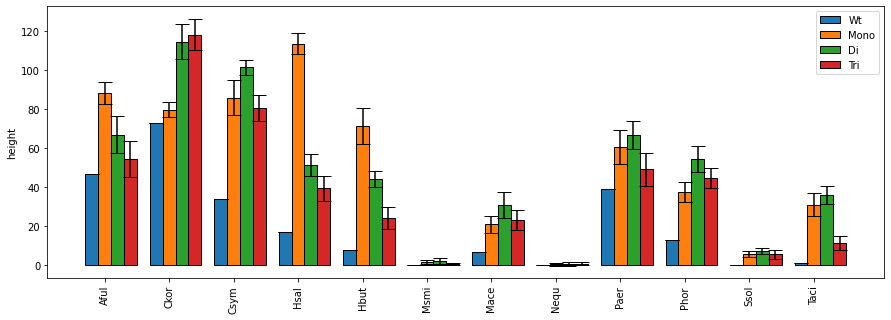

------------
Bacteria


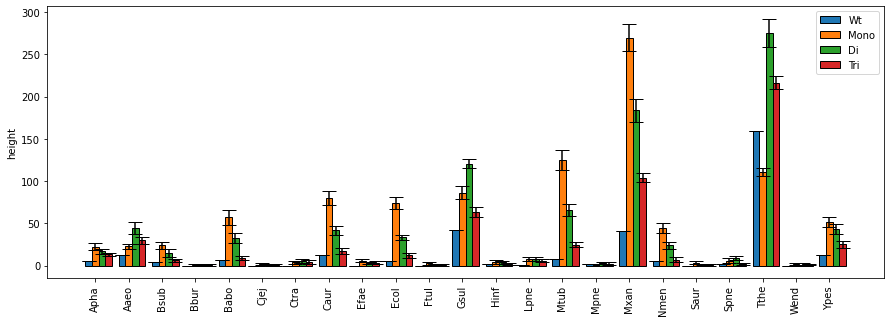

------------
Eukaryote


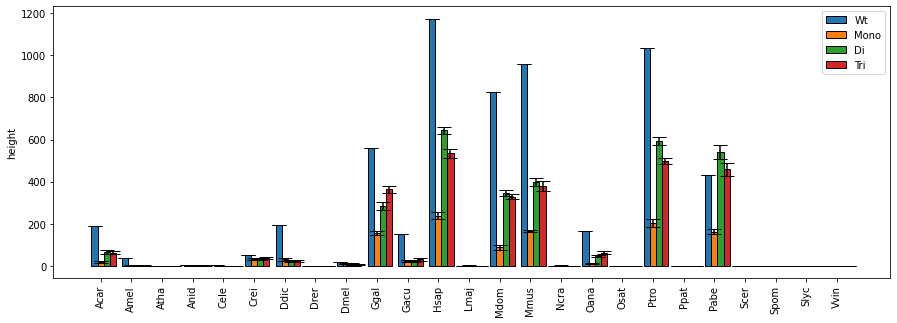

In [24]:
groups = dfHisto.groupby('Kingdom')
for name, group in groups:
    print('------------')
    print(name)
    
    # width of the bars
    barWidth = 0.2
    
    # Choose the height of the blue bars
    barsWt = group[group.Type == 'Wt']['Mean']
    barsDi = group[group.Type == 'Di']['Mean']
    barsMono = group[group.Type == 'Mono']['Mean']
    barsTri = group[group.Type == 'Tri']['Mean']

    # Choose the height of the error bars (bars1)
    yerWt = group[group.Type == 'Wt']['Std']
    yerDi = group[group.Type == 'Di']['Std']
    yerMono = group[group.Type == 'Mono']['Std']
    yerTri = group[group.Type == 'Tri']['Std']

    # The x position of bars
    rWt = np.arange(len(barsWt))
    rMono = [x + barWidth for x in rWt]
    rDi = [x + barWidth for x in rMono]
    rTri = [x + barWidth for x in rDi]
    
    plt.rcParams['figure.figsize'] = [15, 5]
    # Create bars
    plt.bar(rWt, barsWt, width = barWidth, edgecolor = 'black', yerr=yerWt, capsize=7, label='Wt')
    plt.bar(rMono, barsMono, width = barWidth, edgecolor = 'black', yerr=yerMono, capsize=7, label='Mono')
    plt.bar(rDi, barsDi, width = barWidth, edgecolor = 'black', yerr=yerDi, capsize=7, label='Di')
    plt.bar(rTri, barsTri, width = barWidth, edgecolor = 'black', yerr=yerTri, capsize=7, label='Tri')

    # general layout
    if name == 'Archaea':
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Aful', 'Ckor', 'Csym', 'Hsal',
              'Hbut', 'Msmi', 'Mace', 'Nequ', 'Paer', 'Phor', 'Ssol', 'Taci'])
    elif name == 'Bacteria':
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Apha', 'Aaeo', 'Bsub', 'Bbur',
              'Babo', 'Cjej', 'Ctra', 'Caur', 'Efae', 'Ecol', 'Ftul', 'Gsul', 'Hinf', 'Lpne',
              'Mtub', 'Mpne', 'Mxan', 'Nmen', 'Saur', 'Spne', 'Tthe', 'Wend', 'Ypes'])
    else:
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Acar', 'Amel', 'Atha', 'Anid',
              'Cele', 'Crei', 'Ddic', 'Drer', 'Dmel', 'Ggal', 'Gacu', 'Hsap', 'Lmaj', 'Mdom', 'Mmus',
              'Ncra', 'Oana', 'Osat', 'Ptro', 'Ppat', 'Pabe', 'Scer', 'Spom', 'Slyc', 'Vvin'])

    plt.ylabel('height')
    plt.xticks(rotation=90)
    plt.legend()

    # Show graphic
    plt.show()

In [25]:
dicoTp = {'Sp': [], 'Mean': [], 'Std': [], 'Type': [], 'Kingdom': []}  

groups = dfStatBySp.groupby(['Shuffle', 'Sp'])
for name, group in groups:
    group['Density'] = group.NbpG4 / group.LengthSeq * 1000
    dicoTp['Sp'].append(name[1])
    dicoTp['Mean'].append(group.Density.mean())
    dicoTp['Std'].append(group.Density.std())
    dicoTp['Type'].append(name[0])
    dicoTp['Kingdom'].append(list(set(group.Kingdom))[0])
    
dfHisto2 = pd.DataFrame(data=dicoTp)
dfHisto2 = dfHisto2.fillna(0)
dfHisto2

,Sp,Mean,Std,Type,Kingdom
0,anaplasma_phagocytophilum_str_hz,0.084752,0.016442,Di,Bacteria
1,anolis_carolinensis,0.012000,0.001489,Di,Eukaryote
2,apis_mellifera,0.001055,0.001234,Di,Eukaryote
3,aquifex_aeolicus_vf5,0.121113,0.019738,Di,Bacteria
4,arabidopsis_thaliana,0.005769,0.018243,Di,Eukaryote
...,...,...,...,...,...
235,thermoplasma_acidophilum_dsm_1728,0.003838,0.000000,Wt,Archaea
236,thermus_thermophilus_hb8,0.395083,0.000000,Wt,Bacteria
237,vitis_vinifera,0.000000,0.000000,Wt,Eukaryote
238,wolbachia_endosymbiont_of_drosophila_melanogaster,0.000000,0.000000,Wt,Bacteria


------------
Archaea


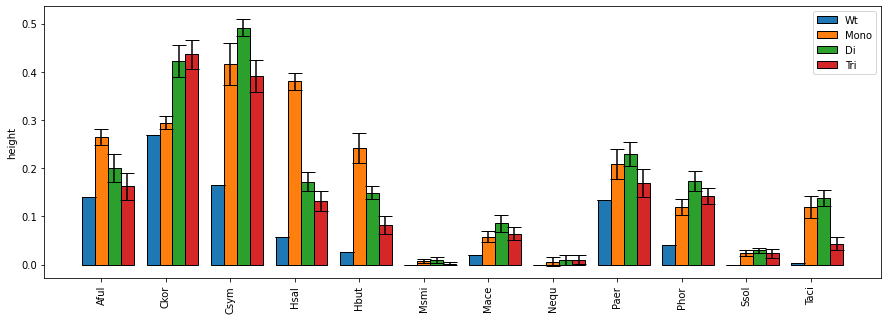

------------
Bacteria


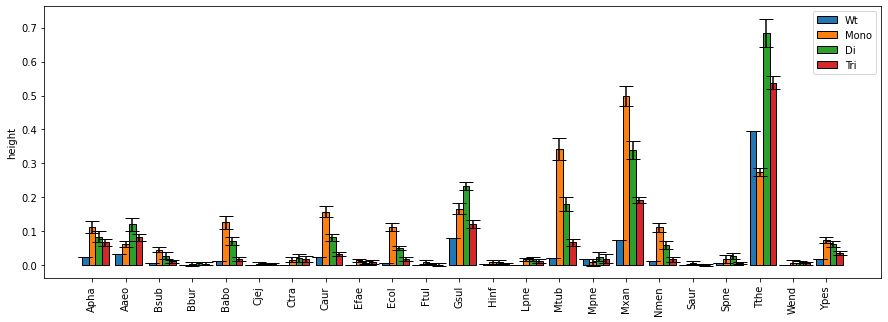

------------
Eukaryote


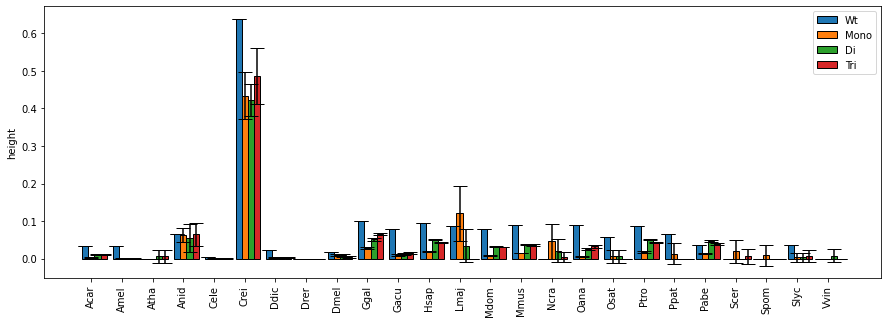

In [26]:
groups = dfHisto2.groupby('Kingdom')
for name, group in groups:
    print('------------')
    print(name)
    
    # width of the bars
    barWidth = 0.2
    
    # Choose the height of the blue bars
    barsWt = group[group.Type == 'Wt']['Mean']
    barsDi = group[group.Type == 'Di']['Mean']
    barsMono = group[group.Type == 'Mono']['Mean']
    barsTri = group[group.Type == 'Tri']['Mean']

    # Choose the height of the error bars (bars1)
    yerWt = group[group.Type == 'Wt']['Std']
    yerDi = group[group.Type == 'Di']['Std']
    yerMono = group[group.Type == 'Mono']['Std']
    yerTri = group[group.Type == 'Tri']['Std']

    # The x position of bars
    rWt = np.arange(len(barsWt))
    rMono = [x + barWidth for x in rWt]
    rDi = [x + barWidth for x in rMono]
    rTri = [x + barWidth for x in rDi]
    
    plt.rcParams['figure.figsize'] = [15, 5]
    # Create bars
    plt.bar(rWt, barsWt, width = barWidth, edgecolor = 'black', yerr=yerWt, capsize=7, label='Wt')
    plt.bar(rMono, barsMono, width = barWidth, edgecolor = 'black', yerr=yerMono, capsize=7, label='Mono')
    plt.bar(rDi, barsDi, width = barWidth, edgecolor = 'black', yerr=yerDi, capsize=7, label='Di')
    plt.bar(rTri, barsTri, width = barWidth, edgecolor = 'black', yerr=yerTri, capsize=7, label='Tri')

    # general layout
    if name == 'Archaea':
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Aful', 'Ckor', 'Csym', 'Hsal',
              'Hbut', 'Msmi', 'Mace', 'Nequ', 'Paer', 'Phor', 'Ssol', 'Taci'])
    elif name == 'Bacteria':
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Apha', 'Aaeo', 'Bsub', 'Bbur',
              'Babo', 'Cjej', 'Ctra', 'Caur', 'Efae', 'Ecol', 'Ftul', 'Gsul', 'Hinf', 'Lpne',
              'Mtub', 'Mpne', 'Mxan', 'Nmen', 'Saur', 'Spne', 'Tthe', 'Wend', 'Ypes'])
    else:
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Acar', 'Amel', 'Atha', 'Anid',
              'Cele', 'Crei', 'Ddic', 'Drer', 'Dmel', 'Ggal', 'Gacu', 'Hsap', 'Lmaj', 'Mdom', 'Mmus',
              'Ncra', 'Oana', 'Osat', 'Ptro', 'Ppat', 'Pabe', 'Scer', 'Spom', 'Slyc', 'Vvin'])

    plt.ylabel('height')
    plt.xticks(rotation=90)
    plt.legend()

    # Show graphic
    plt.show()

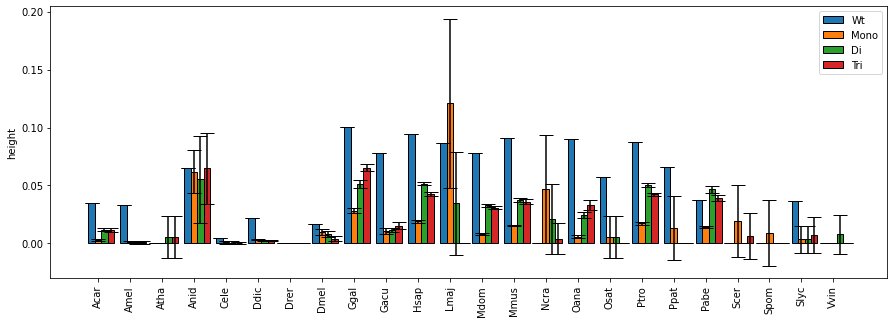

In [27]:
groups = dfHisto2.groupby('Kingdom')
for name, group in groups:
    if name == 'Eukaryote':
        group = group[group.Sp != 'chlamydomonas_reinhardtii']
    
        # width of the bars
        barWidth = 0.2

        # Choose the height of the blue bars
        barsWt = group[group.Type == 'Wt']['Mean']
        barsDi = group[group.Type == 'Di']['Mean']
        barsMono = group[group.Type == 'Mono']['Mean']
        barsTri = group[group.Type == 'Tri']['Mean']

        # Choose the height of the error bars (bars1)
        yerWt = group[group.Type == 'Wt']['Std']
        yerDi = group[group.Type == 'Di']['Std']
        yerMono = group[group.Type == 'Mono']['Std']
        yerTri = group[group.Type == 'Tri']['Std']

        # The x position of bars
        rWt = np.arange(len(barsWt))
        rMono = [x + barWidth for x in rWt]
        rDi = [x + barWidth for x in rMono]
        rTri = [x + barWidth for x in rDi]

        plt.rcParams['figure.figsize'] = [15, 5]
        # Create bars
        plt.bar(rWt, barsWt, width = barWidth, edgecolor = 'black', yerr=yerWt, capsize=7, label='Wt')
        plt.bar(rMono, barsMono, width = barWidth, edgecolor = 'black', yerr=yerMono, capsize=7, label='Mono')
        plt.bar(rDi, barsDi, width = barWidth, edgecolor = 'black', yerr=yerDi, capsize=7, label='Di')
        plt.bar(rTri, barsTri, width = barWidth, edgecolor = 'black', yerr=yerTri, capsize=7, label='Tri')

        # general layout
        plt.xticks([r + barWidth for r in range(len(barsDi))], ['Acar', 'Amel', 'Atha', 'Anid',
                  'Cele', 'Ddic', 'Drer', 'Dmel', 'Ggal', 'Gacu', 'Hsap', 'Lmaj', 'Mdom', 'Mmus',
                  'Ncra', 'Oana', 'Osat', 'Ptro', 'Ppat', 'Pabe', 'Scer', 'Spom', 'Slyc', 'Vvin'])

        plt.ylabel('height')
        plt.xticks(rotation=90)
        plt.legend()

        # Show graphic
        plt.show()

# pG4 families
## Stricte
Maintenant que j'ai les familles de pG4 dans les séquences aléatoires, je peux faire un arbre avec l'histoire de ces familles de pG4. Pour ce faire je vais prendre la moyenne du nombre de famille par arbre.

In [28]:
dicoSpCleanNames = {'anaplasma_phagocytophilum_str_hz': 'Anaplasmaphagocytophilum', 'anolis_carolinensis': 'Anoliscarolinensis', 'apis_mellifera': 'Apismellifera', 'aquifex_aeolicus_vf5': 'Aquifexaeolicus', 'arabidopsis_thaliana': 'Arabidopsisthaliana', 'archaeoglobus_fulgidus_dsm_4304': 'Archeoglobusfulgidus', 'aspergillus_nidulans': 'Aspergillusnidulans', 'bacillus_subtilis_subsp_subtilis_str_168': 'Bacillussubtilis', 'borrelia_burgdorferi': 'Borreliaburgdorferi', 'brucella_abortus_bv_1_str_9_941': 'Brucellaabortus', 'caenorhabditis_elegans': 'Caenorhabditiselegans', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819': 'Campylobacterjejuni', 'candidatus_korarchaeum_cryptofilum_opf8': 'Candidatuskorarchaeumcryptofilum', 'cenarchaeum_symbiosum_a': 'Cenarchaeumsymbiosum', 'chlamydia_trachomatis_d_uw_3_cx': 'Chlamydiatrachomatis', 'chlamydomonas_reinhardtii': 'Chlamydomonasreinhardtii', 'chloroflexus_aurantiacus_j_10_fl': 'Chloroflexusaurantiacus', 'danio_rerio': 'Daniorerio', 'dictyostelium_discoideum': 'Dictyosteliumdiscoideum', 'drosophila_melanogaster': 'Drosophilamelanogaster', 'enterococcus_faecalis_v583': 'Enterococcusfaecalis', 'escherichia_coli_str_k_12_substr_mg1655': 'Escherichiacoli', 'francisella_tularensis_subsp_tularensis_schu_s4': 'Francisellatularensis', 'gallus_gallus': 'Gallusgallus', 'gasterosteus_aculeatus': 'Gasterosteusaculeatus', 'geobacter_sulfurreducens_pca': 'Geobactersulfurreducens', 'haemophilus_influenzae_rd_kw20': 'Haemophilusinfluenzae', 'halobacterium_salinarum_r1': 'Halobacteriumsalinarum', 'homo_sapiens': 'Homosapiens', 'hyperthermus_butylicus_dsm_5456': 'Hyperthermusbutylicus', 'legionella_pneumophila_str_paris': 'Legionellapneumoniae', 'leishmania_major': 'Leishmaniamajor', 'methanobrevibacter_smithii_atcc_35061': 'Metanobrevibactersmithii', 'methanosarcina_acetivorans_c2a': 'Methanosarcinaacetivorans', 'monodelphis_domestica': 'Monodelphisdomestica', 'mus_musculus': 'Musmusculus', 'mycobacterium_tuberculosis_h37rv': 'Mycobacteriumtuberculosis', 'mycoplasma_pneumoniae_m129': 'Mycoplasmapneumoniae', 'myxococcus_xanthus_dk_1622': 'Myxococcusxanthus', 'nanoarchaeum_equitans_kin4_m': 'Nanoarcheumequitans', 'neisseria_meningitidis_z2491': 'Neisseriameningitidis', 'neurospora_crassa': 'Neurosporacrassa', 'ornithorhynchus_anatinus': 'Ornithorhynchusanatinus', 'oryza_sativa': 'Oryzasativa', 'pan_troglodytes': 'Pantroglodytes', 'physcomitrella_patens': 'Physcomitrellapatens', 'pongo_abelii': 'Pongoabelii', 'pyrobaculum_aerophilum_str_im2': 'Pyrobaculumaerophilum', 'pyrococcus_horikoshii_ot3': 'Pyrococcushorikoshii', 'saccharomyces_cerevisiae': 'Saccharomycescerevisiae', 'schizosaccharomyces_pombe': 'Schizosaccharomycespombe', 'solanum_lycopersicum': 'Solanumlycopersicum', 'staphylococcus_aureus_subsp_aureus_n315': 'Staphylococcusaureus', 'streptococcus_pneumoniae_tigr4': 'Streptococcuspneumoniae', 'sulfolobus_solfataricus': 'Sulfolobussolfataricus', 'thermoplasma_acidophilum_dsm_1728': 'Thermoplasmaacidophilum', 'thermus_thermophilus_hb8': 'Thermusthermophilus', 'vibrio_cholerae': 'Vibriocholerae', 'vitis_vinifera': 'Vitisvinifera', 'wolbachia_endosymbiont_of_drosophila_melanogaster': 'Wolbachiaendosymbiontofdrosophilamelanogaster', 'yersinia_pestis_biovar_microtus_str_91001': 'Yersiniapestis', 'sulfolobus_solfataricus_p2': 'Sulfolobussolfataricus', 'borrelia_burgdorferi_b31': 'Borreliaburgdorferi'}

In [29]:
dicoBigMatrice = {'IdFam': [], 'Tree': [], 'Repro': [], 'Shuffle': []}
for sp in dicoSpCleanNames:
    dicoBigMatrice[sp] = []
listGenenotInDicoSp = []

directory = '/home/anais/Documents/Projet/G4Evolution/mergedpG4FamiliesPecentrOrtho_Shuffle/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        if 'Repro' in filename:
            inputfile = directory + '/' + filename
            repro = filename.split('_')[1].split('o')[1]
            grp = filename.split('_')[0].split('o')[1]
            shuffle = filename.split('_')[2].split('.')[0]
            try:
                dfTmp = pd.read_csv(inputfile, sep='\t', index_col=False)
            except:
                dicoBigMatrice['Repro'].append(repro)
                dicoBigMatrice['Shuffle'].append(shuffle)
                dicoBigMatrice['IdFam'].append(grp)
                dicoBigMatrice['Tree'].append(grp)
                for sp in dicoSpCleanNames:
                    dicoBigMatrice[sp].append(0)
            else:
                if len(dfTmp) == 0:
                    dicoBigMatrice['Repro'].append(repro)
                    dicoBigMatrice['Shuffle'].append(shuffle)
                    dicoBigMatrice['IdFam'].append(grp)
                    dicoBigMatrice['Tree'].append(grp)
                    for sp in dicoSpCleanNames:
                        dicoBigMatrice[sp].append(0)
                else:
                    for index, row in dfTmp.iterrows():
                        dicoBigMatrice['Repro'].append(repro)
                        dicoBigMatrice['Shuffle'].append(shuffle)
                        dicoBigMatrice['IdFam'].append(grp+'-'+str(row['Start'])+'-'+str(row['End']))
                        dicoBigMatrice['Tree'].append(grp)
                        for sp in dicoSpCleanNames:
                            dicoBigMatrice[sp].append(0)
                        spList = []
                        for g in row['Genes'].split('|'):
                            if g in dicoGeneListbySp:
                                spList.append(dicoGeneListbySp[g])
                            else:
                                listGenenotInDicoSp.append(g)
                        for sp in (list(set(spList))):
                            dicoBigMatrice[sp][-1] = spList.count(sp)


In [30]:
dfMatrice = pd.DataFrame(data=dicoBigMatrice)
dfMatrice

,IdFam,Tree,Repro,Shuffle,anaplasma_phagocytophilum_str_hz,anolis_carolinensis,apis_mellifera,aquifex_aeolicus_vf5,arabidopsis_thaliana,archaeoglobus_fulgidus_dsm_4304,...,streptococcus_pneumoniae_tigr4,sulfolobus_solfataricus,thermoplasma_acidophilum_dsm_1728,thermus_thermophilus_hb8,vibrio_cholerae,vitis_vinifera,wolbachia_endosymbiont_of_drosophila_melanogaster,yersinia_pestis_biovar_microtus_str_91001,sulfolobus_solfataricus_p2,borrelia_burgdorferi_b31
0,413,413,3,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9828-134-165,9828,10,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13367-512-567,13367,3,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,281,281,3,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13184-12-40,13184,7,Di,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99067,15378-91743-91777,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99068,15378-93029-93058,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99069,15378-93943-93973,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99070,10167,10167,4,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dico = {'Tree': [], 'Average': [], 'Shuffle': []}
groups = dfMatrice.groupby('Shuffle')
for name, group in groups:
    groupsFam = group.groupby('Tree')
    for Tree, groupFam in groupsFam:
        dico['Average'].append(len(groupFam))
        dico['Tree'].append(Tree)
        dico['Shuffle'].append(name)
dfTmp = pd.DataFrame(data=dico)
dfTmp

,Tree,Average,Shuffle
0,10,24,Di
1,100,23,Di
2,10001,60,Di
3,10013,30,Di
4,10016,50,Di
...,...,...,...
1561,9977,95,Tri
1562,9980,12,Tri
1563,9982,10,Tri
1564,9988,44,Tri


Avec ce talbeau je sais combien j'ai de famille en moyenne par arbre, mais ça ne m'aide pas car je n'ai pas cette info pour WT. Par contre juste 1 566 arbre alors que Mono-Di-Tri? -> nop parce que j'ai 522 arbres de base et 3x522 = 1 566.

Maintenant je vais essayer de faire 1 linge = une fam, mais ça risque d'être compliqué vue qu'entre les run il ne devrait pas y avoir les même familles... J'ai décidé de faire un arbre par condition et de calculer la moyenne par ancêtre commun.

In [32]:
dfMatrice = dfMatrice.rename(columns=dicoSpCleanNames)
dfMatrice = dfMatrice.set_index('IdFam')
dfMatrice

,Tree,Repro,Shuffle,Anaplasmaphagocytophilum,Anoliscarolinensis,Apismellifera,Aquifexaeolicus,Arabidopsisthaliana,Archeoglobusfulgidus,Aspergillusnidulans,...,Streptococcuspneumoniae,Sulfolobussolfataricus,Thermoplasmaacidophilum,Thermusthermophilus,Vibriocholerae,Vitisvinifera,Wolbachiaendosymbiontofdrosophilamelanogaster,Yersiniapestis,Sulfolobussolfataricus,Borreliaburgdorferi
IdFam,,,,,,,,,,,,,,,,,,,,,
413,413,3,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9828-134-165,9828,10,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13367-512-567,13367,3,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,281,3,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13184-12-40,13184,7,Di,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15378-91743-91777,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15378-93029-93058,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15378-93943-93973,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
groups = dfMatrice.groupby('Shuffle')
for name, group in groups:
    groupsFam = group.groupby('Repro')
    for Repro, groupFam in groupsFam:
        del groupFam['Tree']
        del groupFam['Shuffle']
        del groupFam['Repro']
        groupFam.astype(int)[['Pongoabelii', 'Leishmaniamajor', 'Saccharomycescerevisiae',
            'Chlamydomonasreinhardtii', 'Vitisvinifera', 'Musmusculus',
            'Neurosporacrassa', 'Solanumlycopersicum', 'Drosophilamelanogaster',
            'Gasterosteusaculeatus', 'Apismellifera', 'Homosapiens',
            'Pantroglodytes', 'Schizosaccharomycespombe', 'Arabidopsisthaliana',
            'Caenorhabditiselegans', 'Oryzasativa', 'Daniorerio', 'Dictyosteliumdiscoideum',
            'Ornithorhynchusanatinus', 'Physcomitrellapatens', 'Gallusgallus',
            'Monodelphisdomestica', 'Anoliscarolinensis', 'Aspergillusnidulans']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Euk_Strong_'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')
        groupFam.astype(int)[['Nanoarcheumequitans', 'Pyrobaculumaerophilum', 'Metanobrevibactersmithii',
            'Cenarchaeumsymbiosum', 'Sulfolobussolfataricus', 'Thermoplasmaacidophilum',
            'Methanosarcinaacetivorans', 'Pyrococcushorikoshii', 'Archeoglobusfulgidus',
            'Halobacteriumsalinarum', 'Hyperthermusbutylicus', 'Candidatuskorarchaeumcryptofilum']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Arc_Strong'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')
        groupFam.astype(int)[['Bacillussubtilis', 'Francisellatularensis',
            'Wolbachiaendosymbiontofdrosophilamelanogaster',
            'Anaplasmaphagocytophilum', 'Mycobacteriumtuberculosis',
            'Geobactersulfurreducens', 'Streptococcuspneumoniae',
            'Chlamydiatrachomatis', 'Borreliaburgdorferi', 'Legionellapneumoniae',
            'Thermusthermophilus', 'Myxococcusxanthus', 'Aquifexaeolicus',
            'Mycoplasmapneumoniae', 'Escherichiacoli', 'Neisseriameningitidis',
            'Campylobacterjejuni', 'Enterococcusfaecalis', 'Haemophilusinfluenzae',
            'Yersiniapestis', 'Staphylococcusaureus', 'Brucellaabortus',
            'Chloroflexusaurantiacus']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Bac_Strong'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')

# Signi Wt vs Shuffle
## Strict
Pour ce faire, on peut utiliser le test z pour vérifier si la valeur WT peut faire partie des échantillons shuffle ou non: http://vps327490.ovh.net/cours/aide_html/fr/fr_test-Z-conformite-moyenne.html

In [34]:
dfWt = pd.DataFrame().append(dfHisto2[dfHisto2.Type == 'Wt'])
dfWt

,Sp,Mean,Std,Type,Kingdom
180,anaplasma_phagocytophilum_str_hz,0.025224,0.0,Wt,Bacteria
181,anolis_carolinensis,0.034626,0.0,Wt,Eukaryote
182,apis_mellifera,0.033576,0.0,Wt,Eukaryote
183,aquifex_aeolicus_vf5,0.032956,0.0,Wt,Bacteria
184,arabidopsis_thaliana,0.000000,0.0,Wt,Eukaryote
185,archaeoglobus_fulgidus_dsm_4304,0.140165,0.0,Wt,Archaea
186,aspergillus_nidulans,0.064998,0.0,Wt,Eukaryote
187,bacillus_subtilis_subsp_subtilis_str_168,0.007836,0.0,Wt,Bacteria
188,borrelia_burgdorferi_b31,0.000000,0.0,Wt,Bacteria
189,brucella_abortus_bv_1_str_9_941,0.013371,0.0,Wt,Bacteria


In [35]:
dfStatBySp['Density'] = dfStatBySp['NbpG4'] / dfStatBySp['LengthSeq'] *1000
dfStatBySp

,Sp,Shuffle,Repro,LengthSeq,NbpG4,Kingdom,Density
0,anaplasma_phagocytophilum_str_hz,Di,1,198225,16.0,Bacteria,0.080716
1,anaplasma_phagocytophilum_str_hz,Di,10,198225,16.0,Bacteria,0.080716
2,anaplasma_phagocytophilum_str_hz,Di,2,198225,20.0,Bacteria,0.100895
3,anaplasma_phagocytophilum_str_hz,Di,3,198225,14.0,Bacteria,0.070627
4,anaplasma_phagocytophilum_str_hz,Di,4,198225,16.0,Bacteria,0.080716
...,...,...,...,...,...,...,...
55,thermoplasma_acidophilum_dsm_1728,Wt,0,260583,1.0,Archaea,0.003838
56,thermus_thermophilus_hb8,Wt,0,402447,159.0,Bacteria,0.395083
57,vitis_vinifera,Wt,0,25350,0.0,Eukaryote,0.000000
58,wolbachia_endosymbiont_of_drosophila_melanogaster,Wt,0,212424,0.0,Bacteria,0.000000


In [36]:
dicoSpShort = {'pan_troglodytes' : 'Ptro', 'homo_sapiens' : 'Hsap', 'pongo_abelii' : 'Pabe', 'mus_musculus' : 'Mmus', 'monodelphis_domestica' : 'Mdom', 'ornithorhynchus_anatinus' : 'Oana', 'anolis_carolinensis' : 'Acar', 'gallus_gallus' : 'Ggal', 'danio_rerio' : 'Drer', 'gasterosteus_aculeatus' : 'Gacu', 'drosophila_melanogaster' : 'Dmel', 'apis_mellifera' : 'Amel', 'caenorhabditis_elegans' : 'Cele', 'neurospora_crassa' : 'Ncra', 'aspergillus_nidulans' : 'Anid', 'saccharomyces_cerevisiae' : 'Scer', 'schizosaccharomyces_pombe' : 'Spom', 'arabidopsis_thaliana' : 'Atha', 'vitis_vinifera' : 'Vvin', 'solanum_lycopersicum' : 'Slyc', 'oryza_sativa' : 'Osat', 'physcomitrella_patens' : 'Ppat', 'chlamydomonas_reinhardtii' : 'Crei', 'leishmania_major' : 'Lmaj', 'methanosarcina_acetivorans_c2a' : 'Mace', 'halobacterium_salinarum_r1' : 'Hsal', 'hyperthermus_butylicus_dsm_5456' : 'Hbut', 'archaeoglobus_fulgidus_dsm_4304' : 'Aful', 'methanobrevibacter_smithii_atcc_35061' : 'Msmi', 'pyrococcus_horikoshii_ot3' : 'Phor', 'thermoplasma_acidophilum_dsm_1728' : 'Taci', 'sulfolobus_solfataricus_p2' : 'Ssol', 'pyrobaculum_aerophilum_str_im2' : 'Paer', 'nanoarchaeum_equitans_kin4_m' : 'Nequ', 'candidatus_korarchaeum_cryptofilum_opf8' : 'Ckor', 'cenarchaeum_symbiosum_a' : 'Csym', 'aquifex_aeolicus_vf5' : 'Aaeo', 'mycoplasma_pneumoniae_m129' : 'Mpne', 'staphylococcus_aureus_subsp_aureus_n315' : 'Saur', 'bacillus_subtilis_subsp_subtilis_str_168' : 'Bsub', 'enterococcus_faecalis_v583' : 'Efae', 'streptococcus_pneumoniae_tigr4' : 'Spne', 'chloroflexus_aurantiacus_j_10_fl' : 'Caur', 'mycobacterium_tuberculosis_h37rv' : 'Mtub', 'thermus_thermophilus_hb8' : 'Tthe', 'chlamydia_trachomatis_d_uw_3_cx' : 'Ctra', 'borrelia_burgdorferi_b31' : 'Bbur', 'campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819' : 'Cjej', 'myxococcus_xanthus_dk_1622' : 'Mxan', 'geobacter_sulfurreducens_pca' : 'Gsul', 'wolbachia_endosymbiont_of_drosophila_melanogaster' : 'Wend', 'anaplasma_phagocytophilum_str_hz' : 'Apha', 'brucella_abortus_bv_1_str_9_941' : 'Babo', 'neisseria_meningitidis_z2491' : 'Nmen', 'legionella_pneumophila_str_paris' : 'Lpne', 'francisella_tularensis_subsp_tularensis_schu_s4' : 'Ftul', 'haemophilus_influenzae_rd_kw20' : 'Hinf', 'yersinia_pestis_biovar_microtus_str_91001' : 'Ypes', 'escherichia_coli_str_k_12_substr_mg1655' : 'Ecol',
               'vibrio_cholerae_o1_biovar_el_tor_str_n16961' : 'Vcho', 'dictyostelium_discoideum' : 'Ddis'}

nbIdem = 0
nbDiff = 0

groups = dfStatBySp.groupby(['Shuffle', 'Sp'])
dico = {'Sp': [], 'Shuffle': [], 'DensityWt': [], 'DensityShuf': [], 'Test': []}
for name, group in groups:
    if name[0] != 'Wt':
        dico['Sp'].append(name[-1])
        dico['Shuffle'].append(name[0])
        dico['DensityWt'].append(list(dfWt[dfWt.Sp == name[-1]]['Mean'])[0])
        dico['DensityShuf'].append(group['Density'].mean())
        k2, p = stats.normaltest(list(group['Density']))
        alpha = 0.05
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            testRes = ztest(x1=list(group['Density']), x2=None, value=list(dfWt[dfWt.Sp == name[-1]]['Mean'])[0])
            if testRes[-1] < 0.05:
                nbDiff += 1
                dico['Test'].append(1)
            else:
                nbIdem += 1
                dico['Test'].append(0)
        else:
            dico['Test'].append(0)

print('Il y a '+str(nbIdem)+' cas sans différences significative contre '+str(nbDiff)+' cas avec des différences.')
dfDiffWtShuf = pd.DataFrame(data=dico)
dfDiffWtShuf['Kingdom'] = dfDiffWtShuf['Sp'].map(dicoKingdom)
dfDiffWtShuf['SpShort'] = dfDiffWtShuf['Sp'].map(dicoSpShort)
dfDiffWtShuf

/home/anais/software/projectsVp3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/anais/software/projectsVp3/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: invalid value encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff
/home/anais/software/projectsVp3/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


Il y a 15 cas sans différences significative contre 21 cas avec des différences.


,Sp,Shuffle,DensityWt,DensityShuf,Test,Kingdom,SpShort
0,anaplasma_phagocytophilum_str_hz,Di,0.025224,0.084752,0,Bacteria,Apha
1,anolis_carolinensis,Di,0.034626,0.012000,0,Eukaryote,Acar
2,apis_mellifera,Di,0.033576,0.001055,0,Eukaryote,Amel
3,aquifex_aeolicus_vf5,Di,0.032956,0.121113,0,Bacteria,Aaeo
4,arabidopsis_thaliana,Di,0.000000,0.005769,0,Eukaryote,Atha
...,...,...,...,...,...,...,...
175,thermoplasma_acidophilum_dsm_1728,Tri,0.003838,0.043364,0,Archaea,Taci
176,thermus_thermophilus_hb8,Tri,0.395083,0.538208,0,Bacteria,Tthe
177,vitis_vinifera,Tri,0.000000,0.000000,0,Eukaryote,Vvin
178,wolbachia_endosymbiont_of_drosophila_melanogaster,Tri,0.000000,0.006120,0,Bacteria,Wend


Archaea
Di


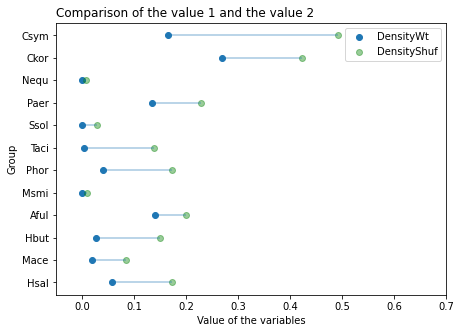

Mono


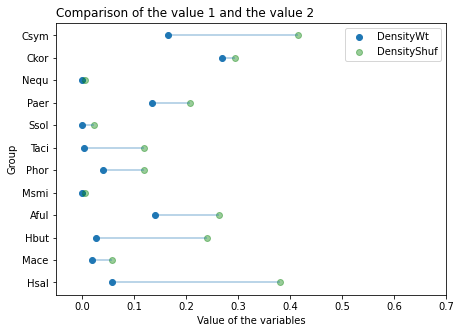

Tri


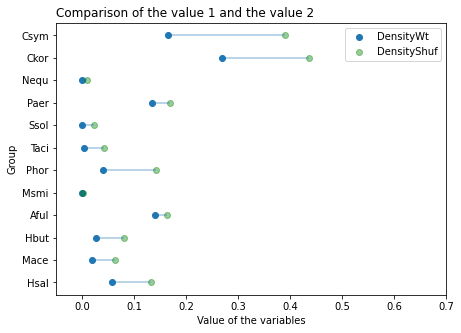

Bacteria
Di


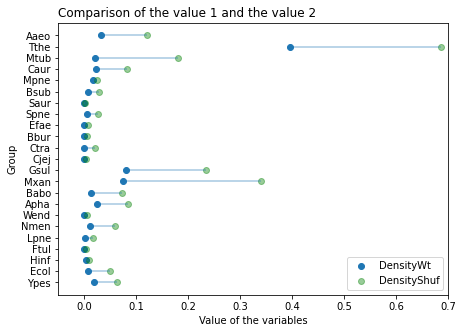

Mono


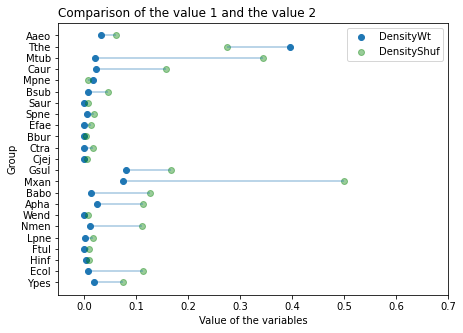

Tri


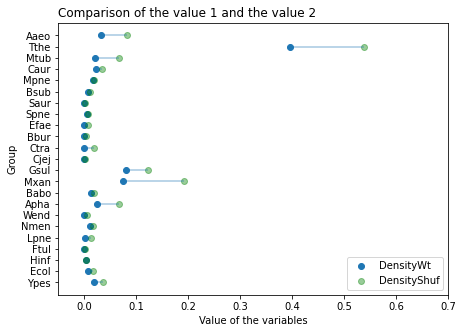

Eukaryote
Di


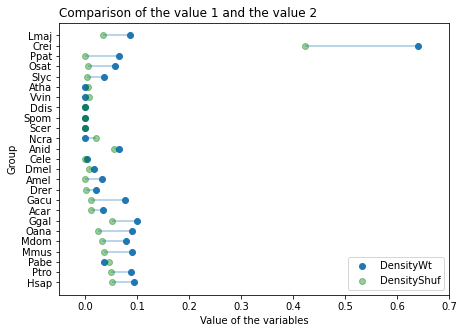

Mono


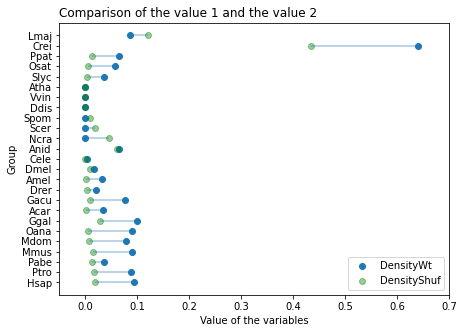

Tri


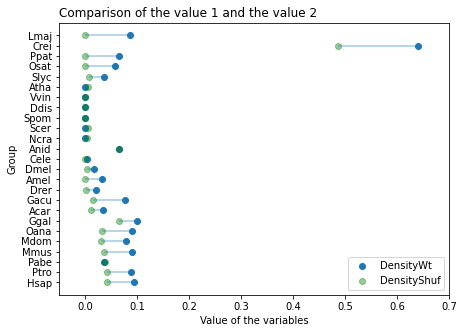

In [37]:
dicoOrder = {'Archaea' : ['Csym', 'Ckor', 'Nequ', 'Paer', 'Ssol', 'Taci', 'Phor', 'Msmi', 'Aful', 'Hbut', 'Mace', 'Hsal'],
            'Bacteria' : ['Aaeo', 'Tthe', 'Mtub', 'Caur', 'Mpne', 'Bsub', 'Saur', 'Spne', 'Efae', 'Bbur', 'Ctra', 'Cjej', 'Gsul', 'Mxan', 'Babo', 'Apha', 'Wend', 'Nmen', 'Lpne', 'Ftul', 'Hinf', 'Ecol', 'Ypes'],
            'Eukaryote' : ['Lmaj', 'Crei', 'Ppat', 'Osat', 'Slyc', 'Atha', 'Vvin', 'Ddis', 'Spom', 'Scer', 'Ncra', 'Anid', 'Cele', 'Dmel', 'Amel', 'Drer', 'Gacu', 'Acar', 'Ggal', 'Oana', 'Mdom', 'Mmus', 'Pabe', 'Ptro', 'Hsap']}


plt.rcParams['figure.figsize'] = [7, 5]
groupsKingdom = dfDiffWtShuf.groupby('Kingdom')
for kingdom, groupKingdom in groupsKingdom:
    print(kingdom)
    
    groupsShuf = groupKingdom.groupby('Shuffle')
    for shuffle, groupShuf in groupsShuf:
        print(shuffle)
        
        groupShuf['SpShort'] = pd.Categorical(
            groupShuf['SpShort'], categories=dicoOrder[kingdom], ordered=True)
        groupShuf = groupShuf.sort_values('SpShort', ascending=False)
        
        my_range=range(1,len(groupShuf.index)+1)
#         my_color=np.where(groupShuf['Test']==0, 'orange', 'black')
 
        # The horizontal plot is made using the hline function
        plt.hlines(y=my_range, xmin=groupShuf['DensityWt'], xmax=groupShuf['DensityShuf'], alpha=0.4)
        plt.scatter(groupShuf['DensityWt'], my_range, alpha=1, label='DensityWt')
        plt.scatter(groupShuf['DensityShuf'], my_range, color='green', alpha=0.4 , label='DensityShuf')
        plt.xlim([-0.05, +0.7])
        plt.legend()

        # Add title and axis names
        plt.yticks(my_range, groupShuf['SpShort'])
        plt.title("Comparison of the value 1 and the value 2", loc='left')
        plt.xlabel('Value of the variables')
        plt.ylabel('Group')

        # Show the graph
        plt.savefig("/home/anais/Pictures/Article3/DoubleLolipopPlotDiff/"+kingdom+"_"+shuffle+".svg")
        plt.show()

# Wide

In [38]:
dicoBigMatrice = {'IdFam': [], 'Tree': [], 'Repro': [], 'Shuffle': []}
for sp in dicoSpCleanNames:
    dicoBigMatrice[sp] = []
listGenenotInDicoSp = []

directory = '/home/anais/Documents/Projet/G4Evolution/FamG4PredShuffle/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        if 'Repro' in filename:
            inputfile = directory + '/' + filename
            repro = filename.split('_')[1].split('o')[1]
            grp = filename.split('_')[0].split('o')[1]
            shuffle = filename.split('_')[2].split('.')[0]
            try:
                dfTmp = pd.read_csv(inputfile, sep='\t', index_col=False)
            except:
                dicoBigMatrice['Repro'].append(repro)
                dicoBigMatrice['Shuffle'].append(shuffle)
                dicoBigMatrice['IdFam'].append(grp)
                dicoBigMatrice['Tree'].append(grp)
                for sp in dicoSpCleanNames:
                    dicoBigMatrice[sp].append(0)
            else:
                if len(dfTmp) == 0:
                    dicoBigMatrice['Repro'].append(repro)
                    dicoBigMatrice['Shuffle'].append(shuffle)
                    dicoBigMatrice['IdFam'].append(grp)
                    dicoBigMatrice['Tree'].append(grp)
                    for sp in dicoSpCleanNames:
                        dicoBigMatrice[sp].append(0)
                else:
                    groups = dfTmp.groupby('idRegion')
                    for name, group in groups:
                        dicoBigMatrice['Repro'].append(repro)
                        dicoBigMatrice['Shuffle'].append(shuffle)
                        dicoBigMatrice['IdFam'].append(name)
                        dicoBigMatrice['Tree'].append(grp)
                        for sp in dicoSpCleanNames:
                            dicoBigMatrice[sp].append(0)
                        for index, row in group.iterrows():
                            if row['qgrs'] == 1:
                                g = row['gene'].split(':')[0]
                                if g in dicoGeneListbySp:
                                    sp = dicoGeneListbySp[g]
                                    dicoBigMatrice[sp][-1] = 1


In [39]:
dfMatrice = pd.DataFrame(data=dicoBigMatrice)
dfMatrice

,IdFam,Tree,Repro,Shuffle,anaplasma_phagocytophilum_str_hz,anolis_carolinensis,apis_mellifera,aquifex_aeolicus_vf5,arabidopsis_thaliana,archaeoglobus_fulgidus_dsm_4304,...,streptococcus_pneumoniae_tigr4,sulfolobus_solfataricus,thermoplasma_acidophilum_dsm_1728,thermus_thermophilus_hb8,vibrio_cholerae,vitis_vinifera,wolbachia_endosymbiont_of_drosophila_melanogaster,yersinia_pestis_biovar_microtus_str_91001,sulfolobus_solfataricus_p2,borrelia_burgdorferi_b31
0,413,413,3,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,grpOrtho9828_Repro10_Tri:134-165,9828,10,Tri,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,grpOrtho13367_Repro3_Tri:512-567,13367,3,Tri,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,281,281,3,Tri,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,grpOrtho13184_Repro7_Di:12-40,13184,7,Di,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99067,grpOrtho15378_Repro8_Mono:91743-91777,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99068,grpOrtho15378_Repro8_Mono:93029-93058,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99069,grpOrtho15378_Repro8_Mono:93943-93973,15378,8,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99070,10167,10167,4,Mono,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
dico = {'Tree': [], 'Average': [], 'Shuffle': []}
groups = dfMatrice.groupby('Shuffle')
for name, group in groups:
    groupsFam = group.groupby('Tree')
    for Tree, groupFam in groupsFam:
        dico['Average'].append(len(groupFam))
        dico['Tree'].append(Tree)
        dico['Shuffle'].append(name)
dfTmp = pd.DataFrame(data=dico)
dfTmp

,Tree,Average,Shuffle
0,10,24,Di
1,100,23,Di
2,10001,60,Di
3,10013,30,Di
4,10016,50,Di
...,...,...,...
1561,9977,95,Tri
1562,9980,12,Tri
1563,9982,10,Tri
1564,9988,44,Tri


In [41]:
dfMatrice = dfMatrice.rename(columns=dicoSpCleanNames)
dfMatrice = dfMatrice.set_index('IdFam')
dfMatrice

,Tree,Repro,Shuffle,Anaplasmaphagocytophilum,Anoliscarolinensis,Apismellifera,Aquifexaeolicus,Arabidopsisthaliana,Archeoglobusfulgidus,Aspergillusnidulans,...,Streptococcuspneumoniae,Sulfolobussolfataricus,Thermoplasmaacidophilum,Thermusthermophilus,Vibriocholerae,Vitisvinifera,Wolbachiaendosymbiontofdrosophilamelanogaster,Yersiniapestis,Sulfolobussolfataricus,Borreliaburgdorferi
IdFam,,,,,,,,,,,,,,,,,,,,,
413,413,3,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grpOrtho9828_Repro10_Tri:134-165,9828,10,Tri,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grpOrtho13367_Repro3_Tri:512-567,13367,3,Tri,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
281,281,3,Tri,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grpOrtho13184_Repro7_Di:12-40,13184,7,Di,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grpOrtho15378_Repro8_Mono:91743-91777,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grpOrtho15378_Repro8_Mono:93029-93058,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
grpOrtho15378_Repro8_Mono:93943-93973,15378,8,Mono,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
groups = dfMatrice.groupby('Shuffle')
for name, group in groups:
    groupsFam = group.groupby('Repro')
    for Repro, groupFam in groupsFam:
        del groupFam['Tree']
        del groupFam['Shuffle']
        del groupFam['Repro']
        groupFam.astype(int)[['Pongoabelii', 'Leishmaniamajor', 'Saccharomycescerevisiae',
            'Chlamydomonasreinhardtii', 'Vitisvinifera', 'Musmusculus',
            'Neurosporacrassa', 'Solanumlycopersicum', 'Drosophilamelanogaster',
            'Gasterosteusaculeatus', 'Apismellifera', 'Homosapiens',
            'Pantroglodytes', 'Schizosaccharomycespombe', 'Arabidopsisthaliana',
            'Caenorhabditiselegans', 'Oryzasativa', 'Daniorerio', 'Dictyosteliumdiscoideum',
            'Ornithorhynchusanatinus', 'Physcomitrellapatens', 'Gallusgallus',
            'Monodelphisdomestica', 'Anoliscarolinensis', 'Aspergillusnidulans']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Euk_Wide_'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')
        groupFam.astype(int)[['Nanoarcheumequitans', 'Pyrobaculumaerophilum', 'Metanobrevibactersmithii',
            'Cenarchaeumsymbiosum', 'Sulfolobussolfataricus', 'Thermoplasmaacidophilum',
            'Methanosarcinaacetivorans', 'Pyrococcushorikoshii', 'Archeoglobusfulgidus',
            'Halobacteriumsalinarum', 'Hyperthermusbutylicus', 'Candidatuskorarchaeumcryptofilum']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Arc_Wide_'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')
        groupFam.astype(int)[['Bacillussubtilis', 'Francisellatularensis',
            'Wolbachiaendosymbiontofdrosophilamelanogaster',
            'Anaplasmaphagocytophilum', 'Mycobacteriumtuberculosis',
            'Geobactersulfurreducens', 'Streptococcuspneumoniae',
            'Chlamydiatrachomatis', 'Borreliaburgdorferi', 'Legionellapneumoniae',
            'Thermusthermophilus', 'Myxococcusxanthus', 'Aquifexaeolicus',
            'Mycoplasmapneumoniae', 'Escherichiacoli', 'Neisseriameningitidis',
            'Campylobacterjejuni', 'Enterococcusfaecalis', 'Haemophilusinfluenzae',
            'Yersiniapestis', 'Staphylococcusaureus', 'Brucellaabortus',
            'Chloroflexusaurantiacus']].to_csv(path_or_buf='/home/anais/Documents/Projet/G4Evolution/Matrices/Ortho_Bac_Wide_'+name+'_'+Repro+'.csv', header=True, index=True, sep='\t')

## Double lolipop plot

In [43]:
dico = {'Grp': [], 'Repro': [], 'Shuffle': [], 'Sp': [], 'idG4': []}

directory = '/home/anais/Documents/Projet/G4Evolution/FamG4PredShuffle/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        if 'Repro' in filename:
            inputfile = directory + '/' + filename
            repro = filename.split('_')[1].split('o')[1]
            grp = filename.split('_')[0].split('o')[1]
            shuffle = filename.split('_')[2].split('.')[0]
            try:
                dfTmp = pd.read_csv(inputfile, sep='\t', index_col=False)
            except:
                pass
            else:
                if len(dfTmp) != 0:
                    dfTmp = dfTmp[dfTmp.qgrs >= 1]
                    for index, row in dfTmp.iterrows():
                        g = row['gene'].split(':')[0]
                        if g in dicoGeneListbySp:
                            sp = dicoGeneListbySp[g]
                            dico['Repro'].append(repro)
                            dico['Shuffle'].append(shuffle)
                            dico['idG4'].append(row['gene'])
                            dico['Grp'].append(grp)
                            dico['Sp'].append(sp)
dfWidepG4 = pd.DataFrame(data = dico)
dfWidepG4

,Grp,Repro,Shuffle,Sp,idG4
0,9828,10,Tri,haemophilus_influenzae_rd_kw20,HI_0800:Chromosome:851013~851402:+
1,9828,10,Tri,aquifex_aeolicus_vf5,aq_073:Chromosome:46465~46842:-
2,9828,10,Tri,geobacter_sulfurreducens_pca,GSU2833:Chromosome:3116832~3117227:-
3,9828,10,Tri,legionella_pneumophila_str_paris,lpp0417:Chromosome:466955~467353:+
4,13367,3,Tri,archaeoglobus_fulgidus_dsm_4304,AF_1393:Chromosome:1242712~1244061:+
...,...,...,...,...,...
148754,15378,8,Mono,gallus_gallus,ENSGALG00000003712:17:6539667~6617270:-
148755,15378,8,Mono,pongo_abelii,ENSPPYG00000019705:9:128435923~128597521:-
148756,15378,8,Mono,ornithorhynchus_anatinus,ENSOANG00000014783:4:19803193~19961682:+
148757,15378,8,Mono,pongo_abelii,ENSPPYG00000019705:9:128435923~128597521:-


In [44]:
dico = {'Sp': [], 'Shuffle': [], 'Repro': [], 'LengthSeq': [], 'nbpG4': []}
groups = dfGeneShuffleLength.groupby(['Sp', 'Shuffle', 'Repro'])
for name, group in groups:
    dico['Sp'].append(name[0])
    dico['Shuffle'].append(name[1])
    dico['Repro'].append(name[2])
    dico['LengthSeq'].append(group.LengthSeq.sum())
    dftmp = dfWidepG4[dfWidepG4.Sp == name[0]]
    dftmp = dftmp[dftmp.Shuffle == name[1]]
    dftmp = dftmp[dftmp.Repro == name[2]]
    dico['nbpG4'].append(len( dftmp ))
dfStatBySpWide = pd.DataFrame(data=dico)
dfStatBySpWide['Kingdom'] = dfStatBySpWide['Sp'].map(dicoKingdom)
dfStatBySpWide

,Sp,Shuffle,Repro,LengthSeq,nbpG4,Kingdom
0,anaplasma_phagocytophilum_str_hz,Di,1,198225,41,Bacteria
1,anaplasma_phagocytophilum_str_hz,Di,10,198225,36,Bacteria
2,anaplasma_phagocytophilum_str_hz,Di,2,198225,27,Bacteria
3,anaplasma_phagocytophilum_str_hz,Di,3,198225,48,Bacteria
4,anaplasma_phagocytophilum_str_hz,Di,4,198225,31,Bacteria
...,...,...,...,...,...,...
1795,yersinia_pestis_biovar_microtus_str_91001,Tri,5,674256,92,Bacteria
1796,yersinia_pestis_biovar_microtus_str_91001,Tri,6,674256,71,Bacteria
1797,yersinia_pestis_biovar_microtus_str_91001,Tri,7,674256,92,Bacteria
1798,yersinia_pestis_biovar_microtus_str_91001,Tri,8,674256,85,Bacteria


In [45]:
dfStatBySpWide['Density'] = dfStatBySpWide['nbpG4'] / dfStatBySpWide['LengthSeq'] *1000
dfStatBySpWide

,Sp,Shuffle,Repro,LengthSeq,nbpG4,Kingdom,Density
0,anaplasma_phagocytophilum_str_hz,Di,1,198225,41,Bacteria,0.206836
1,anaplasma_phagocytophilum_str_hz,Di,10,198225,36,Bacteria,0.181612
2,anaplasma_phagocytophilum_str_hz,Di,2,198225,27,Bacteria,0.136209
3,anaplasma_phagocytophilum_str_hz,Di,3,198225,48,Bacteria,0.242149
4,anaplasma_phagocytophilum_str_hz,Di,4,198225,31,Bacteria,0.156388
...,...,...,...,...,...,...,...
1795,yersinia_pestis_biovar_microtus_str_91001,Tri,5,674256,92,Bacteria,0.136447
1796,yersinia_pestis_biovar_microtus_str_91001,Tri,6,674256,71,Bacteria,0.105301
1797,yersinia_pestis_biovar_microtus_str_91001,Tri,7,674256,92,Bacteria,0.136447
1798,yersinia_pestis_biovar_microtus_str_91001,Tri,8,674256,85,Bacteria,0.126065


I also need to compute Wt density because the dfWt is just for strict prediction.

In [60]:
dico = {'Grp': [], 'Repro': [], 'Shuffle': [], 'Sp': [], 'idG4': []}

directory = '/home/anais/Documents/Projet/G4Evolution/FamG4Pred/'
for path, dirs, files in os.walk(directory):
    for filename in files:
        inputfile = directory + '/' + filename
        grp = filename.split('_')[1]
        try:
            dfTmp = pd.read_csv(inputfile, sep='\t', index_col=False)
        except:
            pass
        else:
            if len(dfTmp) != 0:
                dfTest = dfTmp[dfTmp.G4H >= 1]
                dfTest = dfTest[dfTest.cGcC >= 1]
                dfTest = dfTest[dfTest.G4NN >= 1]
                dfTest = dfTest[dfTest.qgrs < 1]
                dfTmp = dfTmp[dfTmp.qgrs >= 1]
                dfTmp = dfTmp.append(dfTest)
                dfTmp = dfTmp.drop_duplicates()
                for index, row in dfTmp.iterrows():
                    g = row['gene'].split(':')[0]
                    if g in dicoGeneListbySp:
                        sp = dicoGeneListbySp[g]
                        dico['Repro'].append('0')
                        dico['Shuffle'].append('Wt')
                        dico['idG4'].append(row['gene'])
                        dico['Grp'].append(grp)
                        dico['Sp'].append(sp)
dfWideWt = pd.DataFrame(data = dico)

dico = {'Sp': [], 'Shuffle': [], 'Repro': [], 'LengthSeq': [], 'nbpG4': []}
groups = dfGeneShuffleLength.groupby(['Sp', 'Shuffle', 'Repro'])
for name, group in groups:
    if name[1] == 'Mono' and name[2] == '1':
        dico['Sp'].append(name[0])
        dico['Shuffle'].append('Wt')
        dico['Repro'].append('0')
        dico['LengthSeq'].append(group.LengthSeq.sum())
        dftmp = dfWideWt[dfWideWt.Sp == name[0]]
        dico['nbpG4'].append(len( dftmp ))
dfWideWt = pd.DataFrame(data=dico)
dfWideWt['Kingdom'] = dfWideWt['Sp'].map(dicoKingdom)
dfWideWt['Density'] = dfWideWt['nbpG4'] / dfWideWt['LengthSeq'] *1000
dfWideWt

,Sp,Shuffle,Repro,LengthSeq,nbpG4,Kingdom,Density
0,anaplasma_phagocytophilum_str_hz,Wt,0,198225,56,Bacteria,0.282507
1,anolis_carolinensis,Wt,0,5458304,1895,Eukaryote,0.347177
2,apis_mellifera,Wt,0,1042410,447,Eukaryote,0.428814
3,aquifex_aeolicus_vf5,Wt,0,364122,107,Bacteria,0.293858
4,arabidopsis_thaliana,Wt,0,17334,42,Eukaryote,2.422984
5,archaeoglobus_fulgidus_dsm_4304,Wt,0,335319,157,Archaea,0.468211
6,aspergillus_nidulans,Wt,0,30770,35,Eukaryote,1.137472
7,bacillus_subtilis_subsp_subtilis_str_168,Wt,0,510462,120,Bacteria,0.235081
8,borrelia_burgdorferi_b31,Wt,0,158352,39,Bacteria,0.246287
9,brucella_abortus_bv_1_str_9_941,Wt,0,448737,115,Bacteria,0.256275


In [61]:
nbIdem = 0
nbNonNorm = 0
nbDiff = 0

groups = dfStatBySpWide.groupby(['Shuffle', 'Sp'])
dico = {'Sp': [], 'Shuffle': [], 'DensityWt': [], 'DensityShuf': [], 'Test': []}
for name, group in groups:
    if name[0] != 'Wt':
        dico['Sp'].append(name[-1])
        dico['Shuffle'].append(name[0])
        dico['DensityWt'].append(list(dfWideWt[dfWideWt.Sp == name[-1]]['Density'])[0])
        dico['DensityShuf'].append(group['Density'].mean())
        k2, p = stats.normaltest(list(group['Density']))
        alpha = 0.05
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            testRes = ztest(x1=list(group['Density']), x2=None, value=list(dfWideWt[dfWideWt.Sp == name[-1]]['Density'])[0])
            if testRes[-1] < 0.05:
                nbDiff += 1
                dico['Test'].append(1)
            else:
                nbIdem += 1
                dico['Test'].append(0)
        else:
            nbNonNorm += 1
            dico['Test'].append(0)

print('Il y a '+str(nbIdem)+' cas sans différences significative contre '+str(nbDiff)+' cas avec des différences, et il y a '+str(nbNonNorm)+' distribution qui ne sont pas normales.')
dfDiffWtShufWide = pd.DataFrame(data=dico)
dfDiffWtShufWide['Kingdom'] = dfDiffWtShufWide['Sp'].map(dicoKingdom)
dfDiffWtShufWide['SpShort'] = dfDiffWtShufWide['Sp'].map(dicoSpShort)
dfDiffWtShufWide

/home/anais/software/projectsVp3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Il y a 1 cas sans différences significative contre 20 cas avec des différences, et il y a 159 distribution qui ne sont pas normales.


,Sp,Shuffle,DensityWt,DensityShuf,Test,Kingdom,SpShort
0,anaplasma_phagocytophilum_str_hz,Di,0.282507,0.199269,0,Bacteria,Apha
1,anolis_carolinensis,Di,0.347177,0.022809,0,Eukaryote,Acar
2,apis_mellifera,Di,0.428814,0.029835,0,Eukaryote,Amel
3,aquifex_aeolicus_vf5,Di,0.293858,0.240029,0,Bacteria,Aaeo
4,arabidopsis_thaliana,Di,2.422984,0.046152,0,Eukaryote,Atha
...,...,...,...,...,...,...,...
175,thermoplasma_acidophilum_dsm_1728,Tri,0.353054,0.227950,0,Archaea,Taci
176,thermus_thermophilus_hb8,Tri,0.670896,0.460433,0,Bacteria,Tthe
177,vitis_vinifera,Tri,3.155819,0.011834,1,Eukaryote,Vvin
178,wolbachia_endosymbiont_of_drosophila_melanogaster,Tri,0.221256,0.113452,0,Bacteria,Wend


Archaea
Di


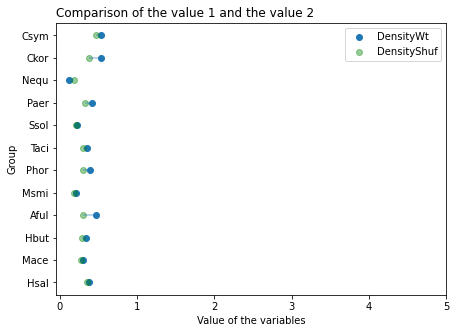

Mono


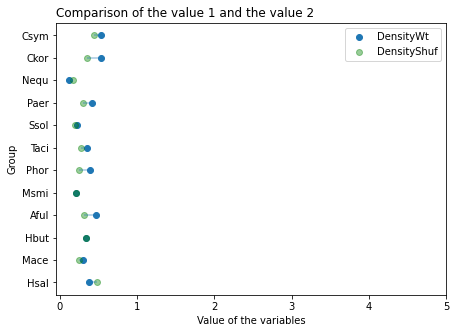

Tri


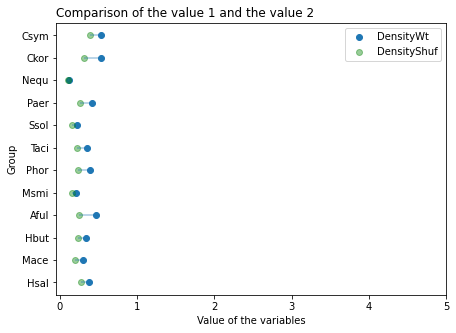

Bacteria
Di


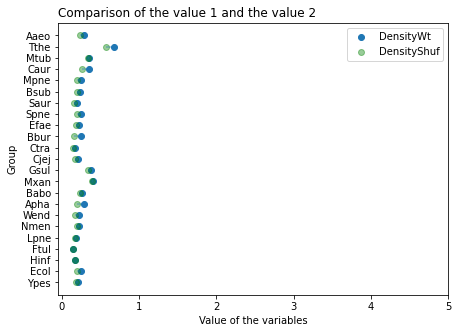

Mono


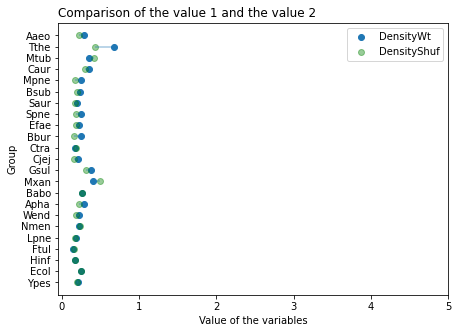

Tri


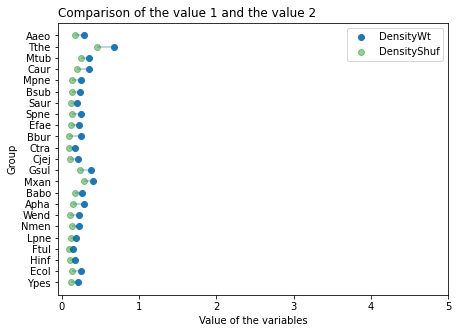

Eukaryote
Di


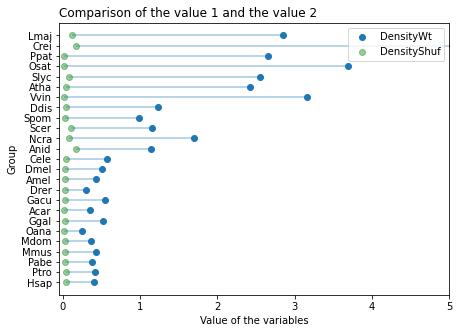

Mono


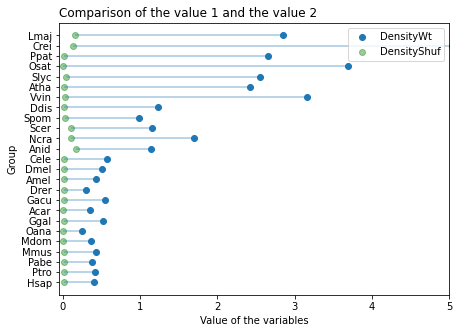

Tri


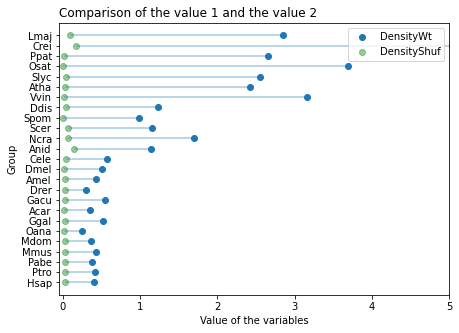

In [62]:
plt.rcParams['figure.figsize'] = [7, 5]
groupsKingdom = dfDiffWtShufWide.groupby('Kingdom')
for kingdom, groupKingdom in groupsKingdom:
    print(kingdom)
    
    groupsShuf = groupKingdom.groupby('Shuffle')
    for shuffle, groupShuf in groupsShuf:
        print(shuffle)
        
        groupShuf['SpShort'] = pd.Categorical(
            groupShuf['SpShort'], categories=dicoOrder[kingdom], ordered=True)
        groupShuf = groupShuf.sort_values('SpShort', ascending=False)
        
        my_range=range(1,len(groupShuf.index)+1)
#         my_color=np.where(groupShuf['Test']==0, 'orange', 'black')
 
        # The horizontal plot is made using the hline function
        plt.hlines(y=my_range, xmin=groupShuf['DensityWt'], xmax=groupShuf['DensityShuf'], alpha=0.4)
        plt.scatter(groupShuf['DensityWt'], my_range, alpha=1, label='DensityWt')
        plt.scatter(groupShuf['DensityShuf'], my_range, color='green', alpha=0.4 , label='DensityShuf')
        plt.xlim([-0.05, +5])
        plt.legend()

        # Add title and axis names
        plt.yticks(my_range, groupShuf['SpShort'])
        plt.title("Comparison of the value 1 and the value 2", loc='left')
        plt.xlabel('Value of the variables')
        plt.ylabel('Group')

        # Show the graph
        plt.savefig("/home/anais/Pictures/Article3/DoubleLolipopPlotDiff/Wide_"+kingdom+"_"+shuffle+".svg")
        plt.show()

In [63]:
dico = {'Sp': [], 'Mean': [], 'Std': [], 'Type': [], 'Kingdom': []}  

groups = dfStatBySpWide.groupby(['Shuffle', 'Sp'])
for name, group in groups:
    group['Density'] = group.nbpG4 / group.LengthSeq * 1000
    dicoTp['Sp'].append(name[1])
    dicoTp['Mean'].append(group.Density.mean())
    dicoTp['Std'].append(group.Density.std())
    dicoTp['Type'].append(name[0])
    dicoTp['Kingdom'].append(list(set(group.Kingdom))[0])
    
dfHistoWide = pd.DataFrame(data=dicoTp)
dfHistoWide = dfHistoWide.fillna(0)
dfHistoWide

,Sp,Mean,Std,Type,Kingdom
0,anaplasma_phagocytophilum_str_hz,0.084752,0.016442,Di,Bacteria
1,anolis_carolinensis,0.012000,0.001489,Di,Eukaryote
2,apis_mellifera,0.001055,0.001234,Di,Eukaryote
3,aquifex_aeolicus_vf5,0.121113,0.019738,Di,Bacteria
4,arabidopsis_thaliana,0.005769,0.018243,Di,Eukaryote
...,...,...,...,...,...
775,thermoplasma_acidophilum_dsm_1728,0.227950,0.030010,Tri,Archaea
776,thermus_thermophilus_hb8,0.460433,0.020492,Tri,Bacteria
777,vitis_vinifera,0.011834,0.026625,Tri,Eukaryote
778,wolbachia_endosymbiont_of_drosophila_melanogaster,0.113452,0.020028,Tri,Bacteria


# Nb G4

In [69]:
dfWtpG4['Kingdom'] = dfWtpG4['Sp'].map(dicoKingdom)
tmp = dfWtpG4.groupby(['Kingdom'])
for nameGrp, grouptmp in tmp:
    print()
    groups = grouptmp.groupby(['Sp'])
    for name, group in groups:
        print(name, group['NbG4'].sum())


archaeoglobus_fulgidus_dsm_4304 47
candidatus_korarchaeum_cryptofilum_opf8 73
cenarchaeum_symbiosum_a 34
halobacterium_salinarum_r1 17
hyperthermus_butylicus_dsm_5456 8
methanobrevibacter_smithii_atcc_35061 0
methanosarcina_acetivorans_c2a 7
nanoarchaeum_equitans_kin4_m 0
pyrobaculum_aerophilum_str_im2 39
pyrococcus_horikoshii_ot3 13
sulfolobus_solfataricus_p2 0
thermoplasma_acidophilum_dsm_1728 1

anaplasma_phagocytophilum_str_hz 5
aquifex_aeolicus_vf5 12
bacillus_subtilis_subsp_subtilis_str_168 4
borrelia_burgdorferi_b31 0
brucella_abortus_bv_1_str_9_941 6
campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819 0
chlamydia_trachomatis_d_uw_3_cx 0
chloroflexus_aurantiacus_j_10_fl 12
enterococcus_faecalis_v583 0
escherichia_coli_str_k_12_substr_mg1655 5
francisella_tularensis_subsp_tularensis_schu_s4 0
geobacter_sulfurreducens_pca 42
haemophilus_influenzae_rd_kw20 2
legionella_pneumophila_str_paris 1
mycobacterium_tuberculosis_h37rv 8
mycoplasma_pneumoniae_m129 2
myxococcus_xanthus_d

In [65]:
groups = dfWideWt.groupby(['Sp'])
for name, group in groups:
    print(name, group.nbpG4.sum())

anaplasma_phagocytophilum_str_hz 56
anolis_carolinensis 1895
apis_mellifera 447
aquifex_aeolicus_vf5 107
arabidopsis_thaliana 42
archaeoglobus_fulgidus_dsm_4304 157
aspergillus_nidulans 35
bacillus_subtilis_subsp_subtilis_str_168 120
borrelia_burgdorferi_b31 39
brucella_abortus_bv_1_str_9_941 115
caenorhabditis_elegans 233
campylobacter_jejuni_subsp_jejuni_nctc_11168_atcc_700819 76
candidatus_korarchaeum_cryptofilum_opf8 144
cenarchaeum_symbiosum_a 111
chlamydia_trachomatis_d_uw_3_cx 37
chlamydomonas_reinhardtii 386
chloroflexus_aurantiacus_j_10_fl 177
danio_rerio 2652
dictyostelium_discoideum 62
drosophila_melanogaster 556
enterococcus_faecalis_v583 89
escherichia_coli_str_k_12_substr_mg1655 162
francisella_tularensis_subsp_tularensis_schu_s4 42
gallus_gallus 2863
gasterosteus_aculeatus 1081
geobacter_sulfurreducens_pca 194
haemophilus_influenzae_rd_kw20 69
halobacterium_salinarum_r1 113
homo_sapiens 5093
hyperthermus_butylicus_dsm_5456 103
legionella_pneumophila_str_paris 78
leishman